Code <span class="caret"></span>

-   <a href="#" id="rmd-show-all-code">Show All Code</a>
-   <a href="#" id="rmd-hide-all-code">Hide All Code</a>
-   
-   <a href="#" id="rmd-download-source">Download Rmd</a>

# Classification

[**Download Chapter notebook
(ipynb)**](https://drive.usercontent.google.com/u/1/uc?id=16T85vbrDYu4Z62ryFA5xVHpwrl7okIvy&export=download)

[**Download Chapter
PDF**](https://drive.usercontent.google.com/u/1/uc?id=1nb6HmNUYC4RXMHv3bVY0NvLBikw_cH0m&export=download)

[<span style="color: rgb(255, 0, 0);">**Mandatory Lesson Feedback
Survey**</span>](https://docs.google.com/forms/d/e/1FAIpQLSdr0capF7jloJhPH3Pki1B3LZoKOG16poOpuVJ7SL2LkwLHQA/viewform?pli=1)

-   How to prepare data for classification?
-   Why do we need to train a model?
-   What does a state space plot represent?
-   How to obtain prediction probabilities?
-   What are the important features?

-   Understanding the classification challenge.
-   Training a classifier model.
-   Understanding the state space plot of model predictions.
-   Obtaining prediction probabilities.
-   Finding important features.

-   [Data Handling](https://learntodiscover.github.io/Data_Handling/)
-   [Numpy arrays (see accompanying tutorial)](setup.md#numpy)
-   [Basic Matplotlib plotting](https://matplotlib.org)

  

  

  

### **Import functions**

``` python
from pandas import read_csv

from numpy import arange, asarray, linspace, c_, meshgrid, zeros, ones

from numpy.random import uniform, seed

from matplotlib.pyplot import subplots, scatter, xlabel, ylabel, xticks, show
```

## Example: Visual Classification

Import the ‘patients_data’ toy dataset and scatter the data for Height
and Weight.

``` python
# Please adjust your path to the file
df = read_csv('data/patients_data.csv')

print(df.shape)

# Convert inches to cm and pounds to kg:
df['Height'] = 2.540*df['Height']
df['Weight'] = 0.454*df['Weight']

df.head(10)
```

    (100, 8)
       Age  Height  Weight  Systolic  Diastolic  Smoker  Gender  Peak Flow
    0   38  180.34  79.904       124         93       1    Male        200
    1   43  175.26  74.002       109         77       0    Male        615
    2   38  162.56  59.474       125         83       0  Female        642
    3   40  170.18  60.382       117         75       0  Female        511
    4   49  162.56  54.026       122         80       0  Female        497
    5   46  172.72  64.468       121         70       0  Female        528
    6   33  162.56  64.468       130         88       1  Female        269
    7   40  172.72  81.720       115         82       0    Male        324
    8   28  172.72  83.082       115         78       0    Male        501
    9   31  167.64  59.928       118         86       0  Female        723

Note that data in the first five columns are either integers (age) or
real numbers (floating point). The classes (categorical data) in the
last two columns come as binary (0/1) for ‘smokers/non-smokers’ and as
strings for ‘male/female’. Both can be used for classification.

## The classification challenge

I am given a set of data from a single subject and feed them to a
computational model. The model then predicts to what (predefined)
*class* this subject belongs. Example: given height and weight data, the
model might try to predict whether the subject is a smoker or a
non-smoker. A naive model will, of course, not be able to predict
reasonably. The *supervised* approach in machine learning is to provide
the model with a set of data where the class has been verified
beforehand and the model can test its (initially random) predictions
against the provided class. An optimisation algorithm is then run to
adjust the (internal) model setting such that the predictions improve as
much as possible. When no further improvement is achieved, the algorithm
stops. The model is then *trained* and ready to predict.

The act of classification is to assign labels to unlabelled data after
model exposure to previously labelled data (e.g. based on medical
knowledge in the case of disease data).

In contrast, in *unsupervised machine learning* the assignment is done
based on exposure to unlabelled data following a search for distinctive
features or ‘structure’ in the data.

We can first check if we are able to distinguish classes visually. For
this, we scatter the data of two columns of a dataframe using the column
names. That is, we look at the distribution of points in a plane. Then
we use the class **label** to color each point in the plane according to
the class it belongs to. String labels like ‘male’ / ‘female’ first need
to be converted to Boolean (binary). 0/1 labels as in the
‘smokers/non-smokers’ column can be used directly.

Let us plot the height-weight data and label them for both cases.

``` python
fig, ax = subplots(figsize=(12,6),ncols=2,nrows=1)

gender_boolean = df['Gender'] == 'Female'

ax[0].scatter(df['Height'], df['Weight'], c=gender_boolean, cmap='bwr')
ax[0].set_xlabel('Height', fontsize=14)
ax[0].set_ylabel('Weight', fontsize=14)
ax[0].set_title('Female (red), Male (blue)', fontsize=16)

ax[1].scatter(df['Height'], df['Weight'], c=df['Smoker'], cmap='bwr')
ax[1].set_xlabel('Height', fontsize=16)
ax[1].set_ylabel('Weight', fontsize=16)
ax[1].set_title('Smoker (red), Non-Smoker (blue)', fontsize=16);

show()
```

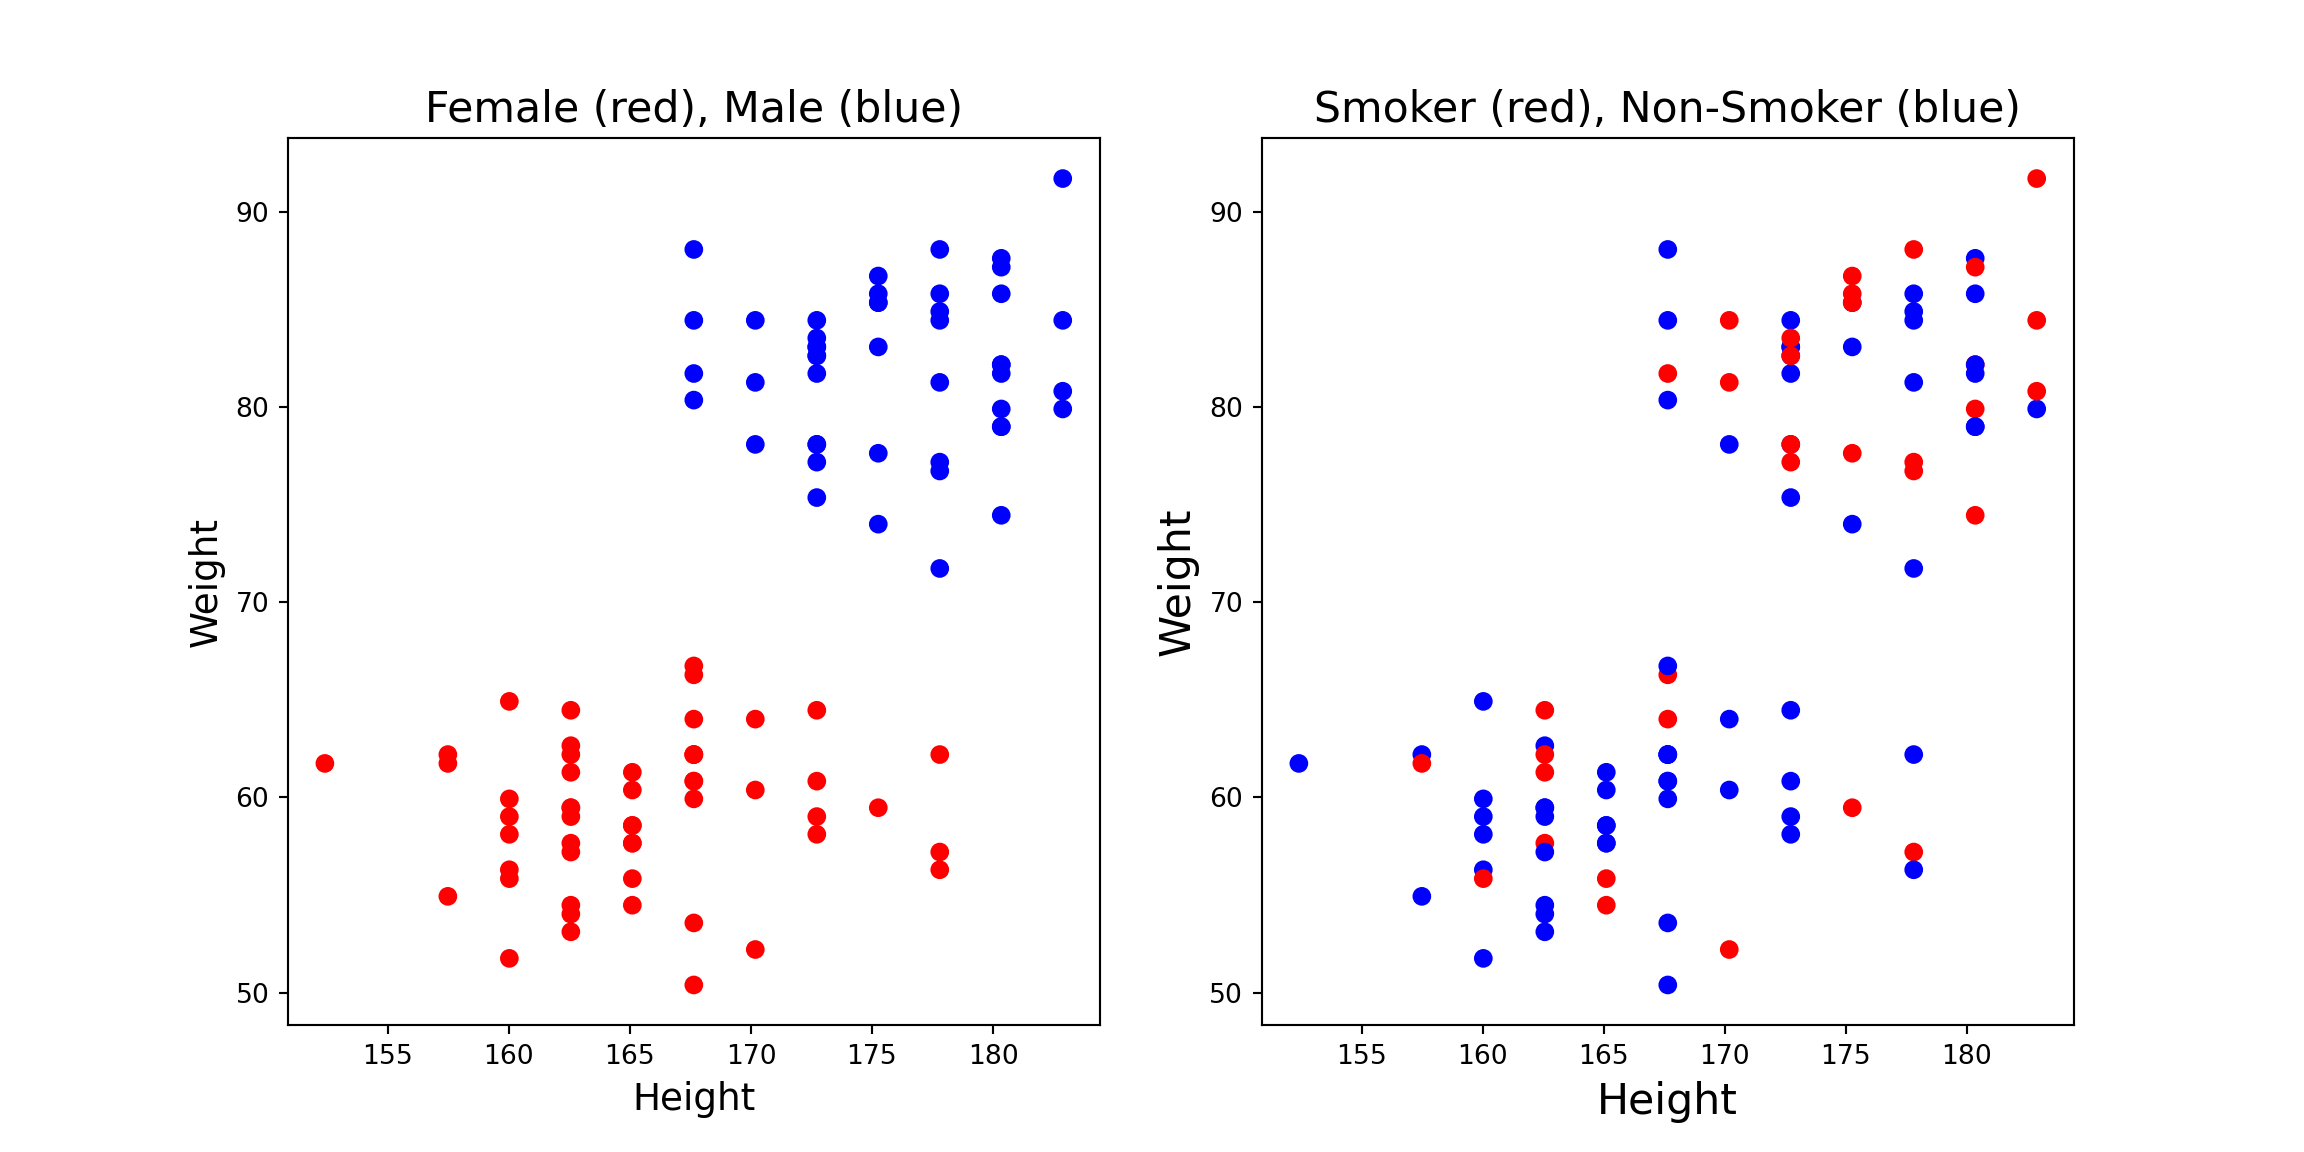

It appears from these graphs that based on height and weight data it is
possible to distinguish male and female. Based on visual inspection one
could conclude that everybody with a weight lower than 70kg is female
and everybody with a weight above 70kg is male. That would be a
classification based on the weight alone. It also appears that the data
points classified as ‘male’ are taller on average, so it might be
helpful to have the height recorded as well. E.g it could improve the
prediction of gender for new subjects with a weight around 70 kg. But it
would not be the best choice if only a single quantity was used. Thus, a
second conclusion is that based on these data the weight is more
important for the classification than the height.

On the other hand, based on the smoker / non-smoker data it will not be
possible to distinguish smokers from non-smokers. Red dots and blue dots
are scattered throughout the graph. The conclusion is that height and
weight cannot be used to predict whether a subject is a smoker.

## Supervised Learning: Training a Model

This lesson deals with labelled data. Labelled data are numerical data
with an extra column of a **label** for each sample. A sample can
consist of any number of individual observations but must be at least
two.

Examples of labels include ‘control group / test group’; ‘male /
female’; ‘healthy / diseased’; ‘before treatment / after treatment’.

The task in Supervised Machine Learning is to fit (train) a model to
distinguish between the groups by ‘learning’ from so-called training
data. After training, the optimised model automatically labels incoming
(unlabeled) data. The better the model, the better the labelling
(prediction).

The model itself is a black box. It has set default parameters to start
with and thus performs badly in the beginning. Essentially, it starts by
predicting a label at random. The process of training consists in
repeatedly changing the model parameters such that the performance
improves. After the training, the model parameters are supposed to be
optimal. Of course, the model cannot be expected to reveal anything
about the mechanism or cause that underlies the distinction between the
labels.

The performance of the model is tested by splitting a dataset with
labels into:

-   the `train data`, those that will be used for model fitting, and

-   the `test data`, those that will be used to check how well the model
    predicts.

The result of the model fitting is then assessed by checking how many of
the (withheld) labels in the test data were correctly predicted by the
trained model. We can also retrieve the confidence of the model
prediction, i.e. the probability that the assigned label is correct.

As an additional result, the procedure will generate the so-called
feature importances: similar to how we concluded above that weight is
more important than height for gender prediction, the feature importance
informs to which degree each of the data columns actually contributes to
the predictions.

## Scikit Learn

We will import our machine learning functionality from the [SciKit Learn
library](https://scikit-learn.org/stable/).

## SciKit Learn

SciKit Learn is a renowned open source application programming interface
(API) for machine learning. It enjoys a vibrant community and is well
maintained. It is always beneficial to use the official documentations
for every API. SciKit Learn provides an exceptional documentation with
detailed explanations and examples at every level.

The implementation of algorithms in SciKit Learn follows a very specific
protocol. First and foremost, it uses a programming paradigm known as
object-oriented programming (OOP). Thanks to Python, this does not mean
that you as the user are also forced to use OOP. But you need to follow
a specific protocol to use the tools that are provided by SciKit Learn.

Unlike functions that perform a specific task and return the results, in
OOP, we use *classes* to encapsulate interconnected components and
functionalities. In accordance with the convention of best practices for
Python programming (also known as PEP8), classes are implemented with
camel-case characters; e.g. `RandomForestClassifier`. In contrast,
functions should be implemented using lower-case characters only;
e.g. `min` or `round`.

## Classification

### **Prepare data with labels**

The terminology that is widely used in Machine Learning (including
Scikit Learn) refers to data points as **samples**, and the different
types of recordings(columns in our case) are referred to as
**features**. In `Numpy` notation, samples are organised in rows,
features in columns.

We can use the function `uniform` from numpy.random to generate
uniformly distributed random data. Here we create 100 samples of two
features (as in the visualisation above). We decide to have values
distributed between 0 and 100.

The convention in machine learning is to call the training data ‘X’.
This array must be **two dimensional**, where rows are the samples and
columns are the features.

``` python
low  = 0
high = 100

n_samples, m_features = 100, 2

RANDOM_SEED  = 1234

seed(RANDOM_SEED)

random_numbers = uniform(low=low, high=high, size=(n_samples, m_features))

X = random_numbers.round(3)

print('Dimensions of training data')
print('')
print('Number of samples:  ', X.shape[0])
print('Number of features: ', X.shape[1])
print('')
```

    Dimensions of training data

    Number of samples:   100
    Number of features:  2

## Note

This code uses a **random number generator**. The output of a random
number generator is different each time it is run. On the one hand, this
is good because it allows us to create many realisations of samples
drawn from a fixed distribution. On the other hand, when testing and
sharing code this prevents exact reproduction of results. We therefore
use the `seed` function to reset the generator such that with a given
number for the seed (the parameter called `RANDOM_SEED`) the same
numbers are produced.

Let us check the histograms of both features:

``` python
fig, ax = subplots()

ax.hist(X, bins=10);

show()
```

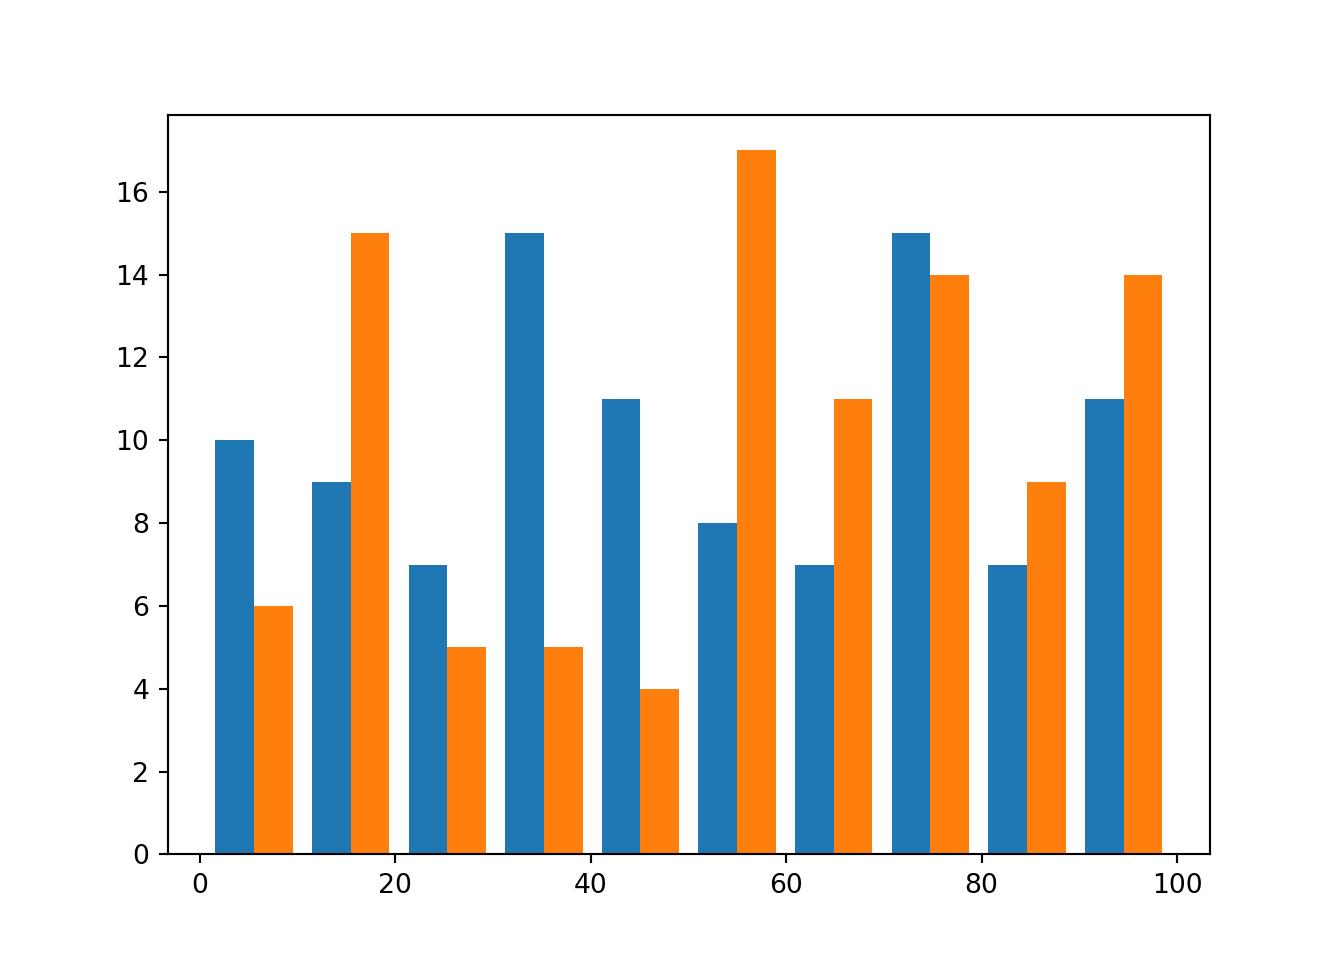

We find that both features are distributed over the selected range of
values. Due to the small number of samples, the distribution is not very
even.

The categorical data used to distinguish between different classes are
called **labels**. Let us create an artificial set of labels for our
first classification task.

We pick an arbitrary threshold and call all values `True` if the values
in both the first and the second feature are above the threshold. The
resulting labels `True` and `False` can be viewed as 0/1 using the
method `astype` with argument `int`.

``` python
threshold = 50

y = (X[:,0] > threshold) & (X[:,1] > threshold)

y.astype(int)
```

array(\[0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
0, 0, 0, 0, 0, 0, 1\])

If both features (columns) were risk factors, this might be interpreted
as: only if both risk factors are above the threshold, a subject is
classified as ‘at risk’, meaning it gets label ‘True’ or ‘1’.

Labels must be **one-dimensional**. You can check this by printing the
`shape`. The output should be a single number:

``` python
print('Number of labels:', y.shape)
```

Number of labels: (100,)

### **The Random Forest Classifier**

To start with our learning algorithm, we import one of the many
classifiers from Scikit Learn: it is called Random Forest.

``` python
from sklearn.ensemble import RandomForestClassifier
```

The Random Forest is a member of the ensemble learning family, whose
objective is to combine the predictions of several optimisations to
improve their performance, generalisability, and robustness.

Ensemble methods are often divided into two different categories:

1.  Averaging methods: Build several estimators independently, and
    average their predictions. In general, the combined estimator tends
    to perform better than any single estimator due to the reduction in
    variance. Examples: Random Forest and Decision Tree.

2.  Boosting methods: Build the estimators sequentially, and attempt to
    reduce the bias of the combined estimator. Although the performance
    of individual estimators may be weak, upon combination, they amount
    to a powerful ensemble. Examples: Gradient Boosting and AdaBoost.

We now train a model using the Python class for the Random Forest
classifier. Unlike a function (which we can use out of the box) a class
needs to be *instantiated* before it can be used. In Python, we
instantiate a class as follows:

``` python
clf = RandomForestClassifier(random_state=RANDOM_SEED)
```

where `clf` now represents an *instance* of class
`RandomForestClassifier`. Note that we have set the keyword argument
`random_state` to a number. This is to assure reproducibility of the
results. (It does not have to be the same as above, pick any integer).

The instance of a class is typically referred to as an object, whose
type is the class that it represents:

``` python
print('Type of clf:', type(clf))
print('')
```

    Type of clf: <class 'sklearn.ensemble._forest.RandomForestClassifier'>

Once instantiated, we can use this object, `clf`, to access the methods
that are associated with that class. Methods are essentially functions
that are encapsulated inside a class.

In SciKit Learn all classes have a `.fit()` method. Its function is to
receive the training data and perform the training of the model.

### Train a model

To train a model, we apply the fit method to the training data, labelled
‘X’, given the corresponding labels ‘y’:

``` python
clf.fit(X, y)
```

    RandomForestClassifier(random_state=1234)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

RandomForestClassifier

<a
href="https://scikit-learn.org/1.6/modules/generated/sklearn.ensemble.RandomForestClassifier.html"
class="sk-estimator-doc-link fitted" rel="noreferrer"
target="_blank">?<span>Documentation for
RandomForestClassifier</span></a><span class="sk-estimator-doc-link fitted">iFitted</span>

    RandomForestClassifier(random_state=1234)

And that’s it. All the machine learning magic done. `clf` is now a
trained model with optimised parameters which we can use to predict new
data.

### **Predict Test Data**

### Categorical Prediction

We start by creating a number of test data in the same way as we created
the training data. Note that the number of test samples is arbitrary.
You can create any number of samples. However, you must provide the same
number of features (columns) used in the training of the classifier. In
our case that is 2.

``` python
RANDOM_SEED_2 = 123

seed(RANDOM_SEED_2)

new_samples = 10

features = X.shape[1]

new_data = uniform(low=low, high=high, size=(10, 2))

print('Shape of new data', new_data.shape)
print('')
print(new_data)
```

    Shape of new data (10, 2)

    [[69.64691856 28.6139335 ]
     [22.68514536 55.13147691]
     [71.94689698 42.31064601]
     [98.07641984 68.48297386]
     [48.09319015 39.21175182]
     [34.31780162 72.90497074]
     [43.85722447  5.96778966]
     [39.80442553 73.79954057]
     [18.24917305 17.54517561]
     [53.15513738 53.18275871]]

There are 10 randomly created pairs of numbers in the same range as the
training data. They represent ‘unlabelled’ incoming data which we offer
to the trained model.

The method `.predict()` helps us to find out what the model claims these
data to be:

``` python
predictions = clf.predict(new_data)

print('Predictions: ', predictions)
```

Predictions: \[False False False True False False False False False
True\]

They can also be viewed as zeros and ones:

``` python
predictions.astype(int)
```

array(\[0, 0, 0, 1, 0, 0, 0, 0, 0, 1\])

According to the model, data points with indices 3, and 9 are in class
`True` (or `1`).

Predicting individual samples is fine, but does not tell us whether the
classifier was able to create a good model of the class distinction. To
check the training result systematically, we create a state space grid
over the state space. This is the same as creating a coordinate system
of data points (as in a scatter plot), in our case with values from 0 to
100 in each feature.

Here we use a resolution of 100, ie. we create a 100 by 100 grid:

``` python
resolution = 100

vec_a = linspace(low, high, resolution)
vec_b = vec_a

grid_a, grid_b = meshgrid(vec_a, vec_b)

grid_a_flat = grid_a.ravel()
grid_b_flat = grid_b.ravel()

XY_statespace = c_[grid_a_flat, grid_b_flat]

print(XY_statespace.shape)
```

(10000, 2)

Now we can offer the grid of the X-Y state space as ‘new data’ to the
classifier and obtain the predictions. We can then plot the grid points
and colour them according to the labels assigned by the trained model.

``` python
predictions = clf.predict(XY_statespace)

predictions.shape
```

(10000,)

We obtain 10,000 predictions, one for each point on the grid.

To compare the data with the original thresholds and the model
predictions we can use plots of the state space:

``` python
feature_1, feature_2 = 0, 1

fig, ax = subplots(ncols=2, nrows=1, figsize=(10, 5))

ax[0].scatter(X[:, feature_1], X[:, feature_2], c=y, s=4, cmap='bwr');
ax[1].scatter(XY_statespace[:, feature_1], XY_statespace[:, feature_2], c=predictions, s=1, cmap='bwr');

p1, p2 = [threshold, threshold], [100, threshold]
p3, p4 = [threshold, 100], [threshold, threshold]

ax[0].plot(p1, p2, c='k')
ax[0].plot(p3, p4, c='k')

ax[0].set_xlabel('Feature 1', fontsize=16)
ax[0].set_ylabel('Feature 2', fontsize=16);
ax[1].set_xlabel('Feature 1', fontsize=16);

show()
```

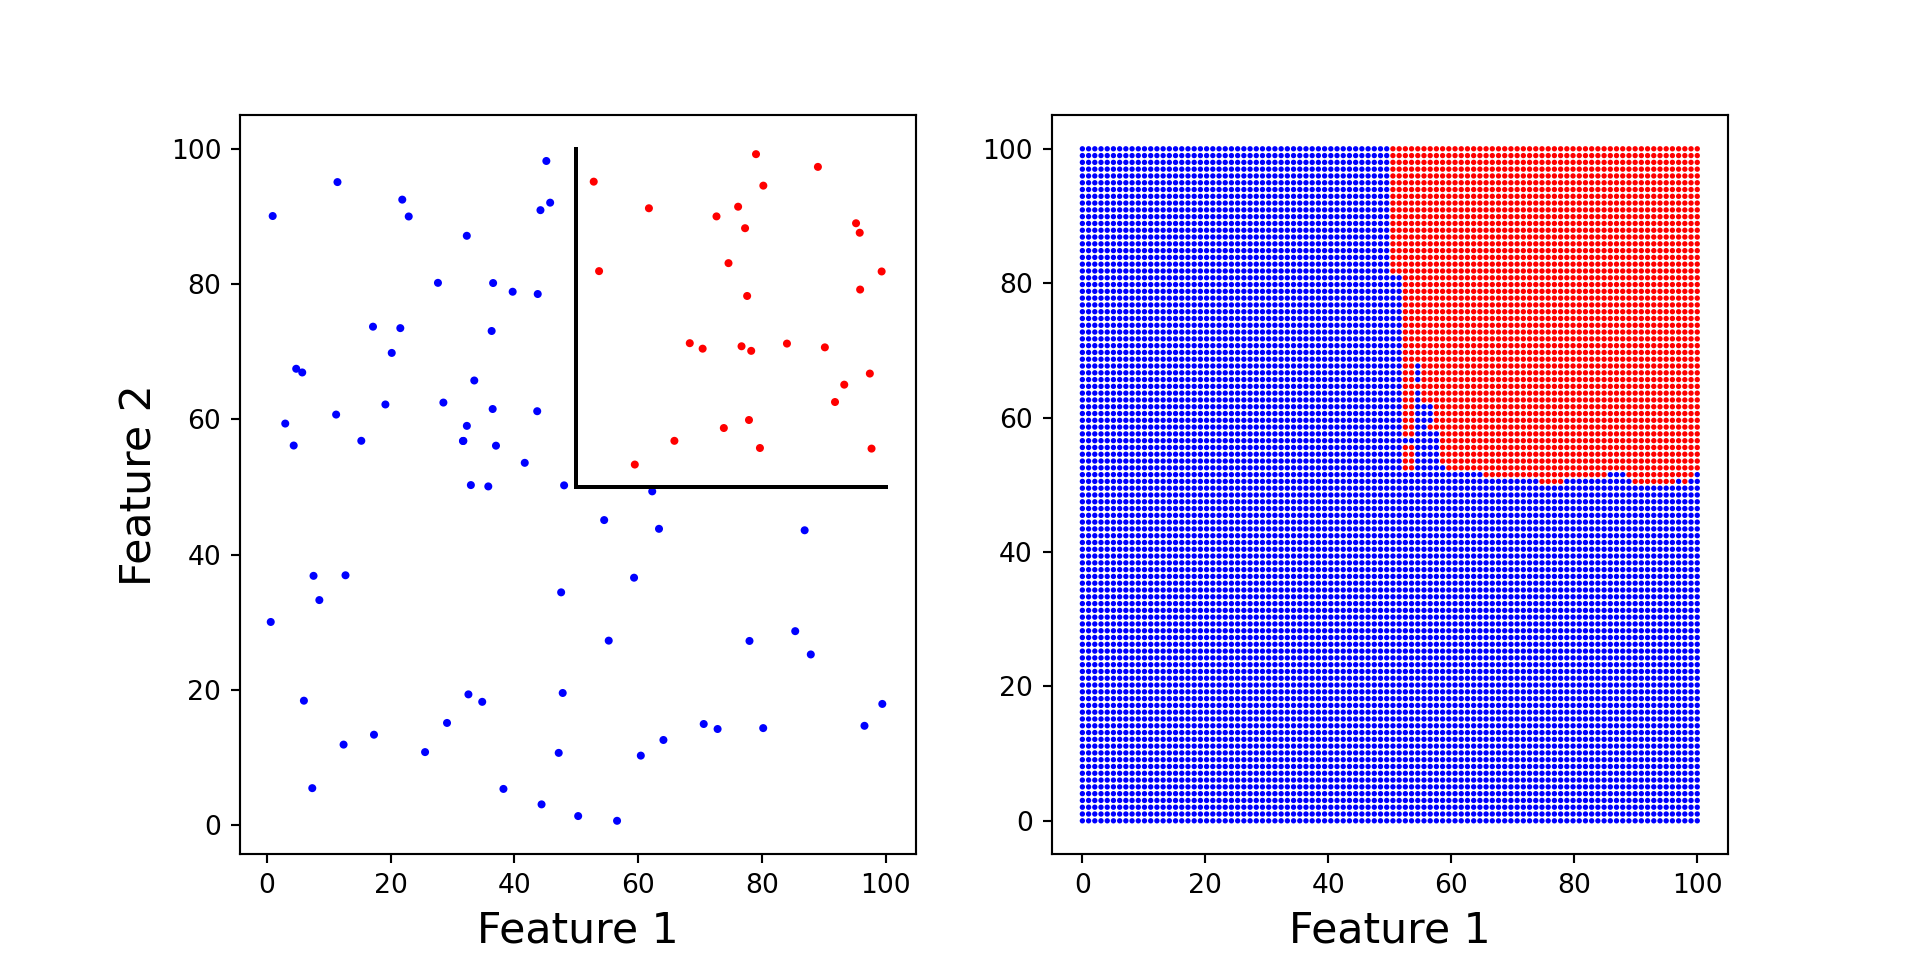

Left is a scatter plot of the data points used for training. They are
coloured according to their labels. The black lines indicate the
threshold boundaries that we introduced to distinguish the two classes.
On the right hand side are the predictions for the coordinate grid.
Label 0 is blue, label 1 is red.

Based on the training samples (left), a good classification can be
achieved with the model (right). But some problems persist. In
particular, the boundaries are not sharp.

### Probability Prediction

Let us pick a sample near the boundary. We can get its predicted label.
In addition, using `.predict_proba()` we can get the probability of this
prediction. This reflects the confidence in the prediction. 50%
probability means, the prediction is at chance level, i.e. equivalent to
a coin toss.

``` python
pos = 55

test_sample = [[pos, pos]]

test_sample_label = clf.predict(test_sample)

test_sample_proba = clf.predict_proba(test_sample)

print('Prediction:', test_sample_label)
print(clf.classes_, test_sample_proba)
```

    Prediction: [False]
    [False  True] [[0.57 0.43]]

``` python
bins = arange(test_sample_proba.shape[1])

fig, ax = subplots()

ax.bar(bins, test_sample_proba[0,:], color=('b', 'r'))
ax.set_ylabel('Probability', fontsize=16)
xticks(bins, ('Label 0', 'Label 1'), fontsize=16);

show()
```

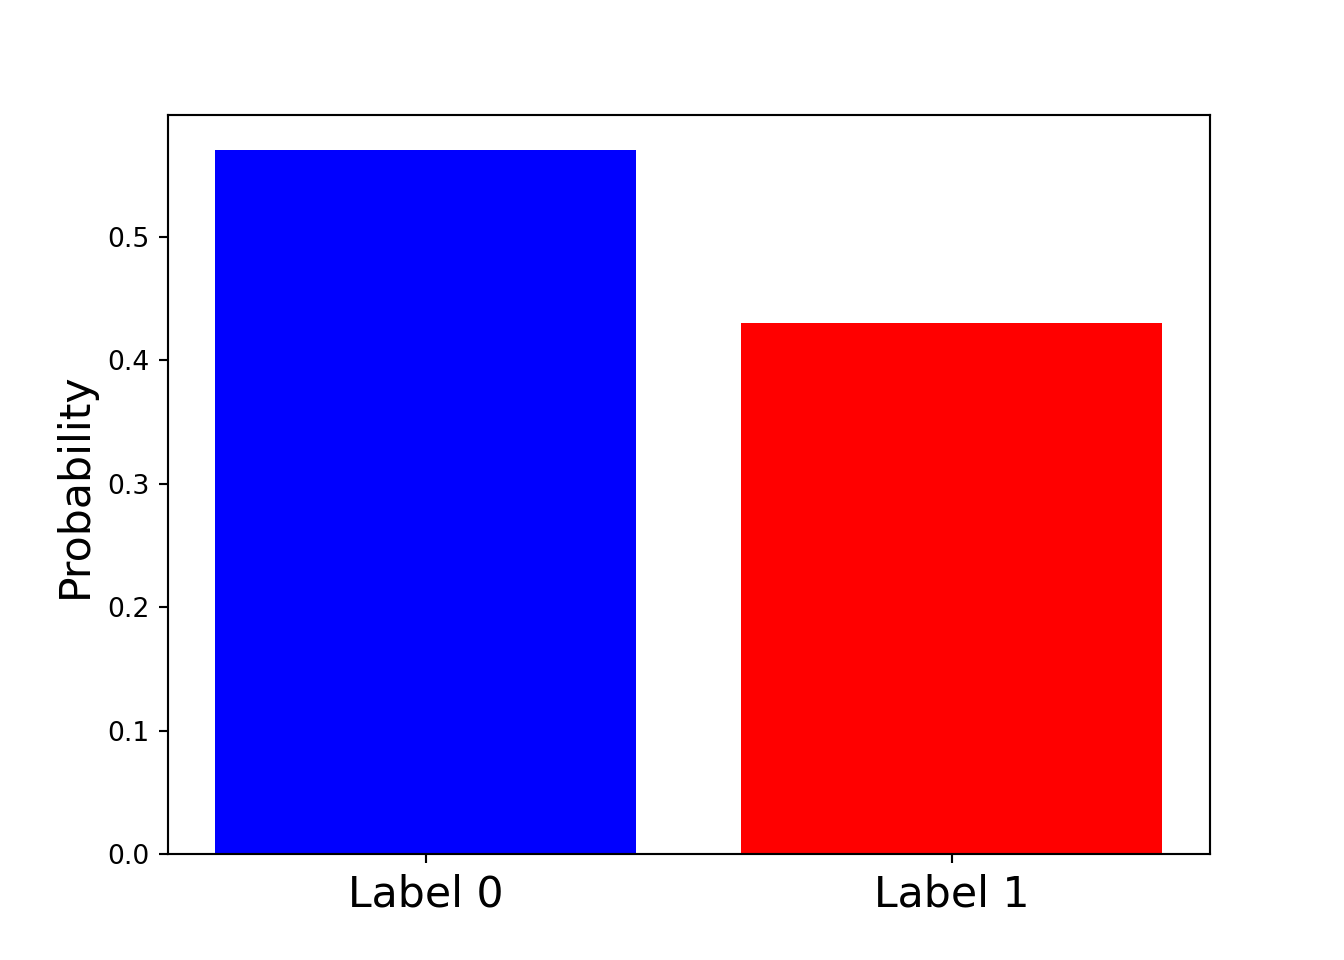

Even though the sample is from the region that (according to the
creation of the data) is in the ‘True’ region, it is labelled as false.
The reason is that there were few or no training data points in that
specific region.

Here is a plot of the probability for the state space. White represents
False and Black represents True, the values in between are gray coded.
Note that the probability values are complementary. We only need the
probabilities for one of our classes.

``` python
state_space_proba = clf.predict_proba(XY_statespace)

grid_shape = grid_a.shape

proba_grid = state_space_proba[:, 1].reshape(grid_shape)

contour_levels = linspace(0, 1, 6)


fig, ax = subplots(figsize=(6, 5))

cax = ax.contourf(grid_a, grid_b, proba_grid, cmap='Greys', levels=contour_levels)
fig.colorbar(cax)
```

``` python
ax.scatter(test_sample[0][0], test_sample[0][1], c='r', marker='o', s=100)

ax.plot(p1, p2, p3, p4, c='r')

ax.set_xlabel('Feature 1', fontsize=16)
ax.set_ylabel('Feature 2', fontsize=16);

show()
```

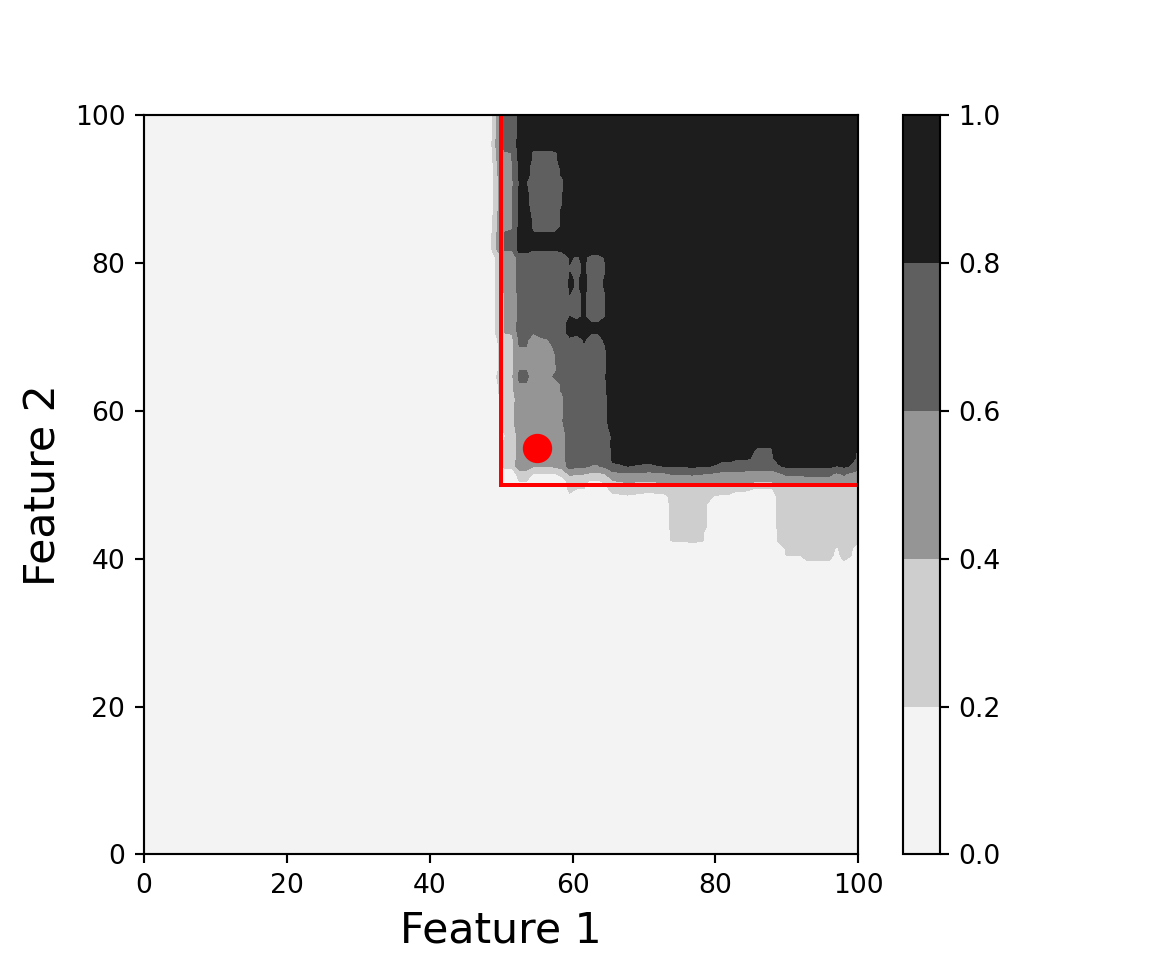

The single red dot marks the individual data point we used to illustrate
the prediction probability above.

### Feature Importances

We can check the contribution of each feature for the success of the
classification. The feature importance is given as the fraction
contribution of each feature to the prediction.

``` python
importances = clf.feature_importances_

print('Relative importance:')

template = 'Feature 1: {:.1f}%; Feature 2: {:.1f}%'

print(template.format(importances[0]*100, importances[1]*100))

bins = arange(importances.shape[0])

fig, ax = subplots()

ax.bar(bins, importances, color=('g', 'm'));
ax.set_ylabel('Feature Importance', fontsize=16)

xticks(bins, ('Feature 1', 'Feature 2'), fontsize=16);

show()
```

    Relative importance:
    Feature 1: 61.6%; Feature 2: 38.4%

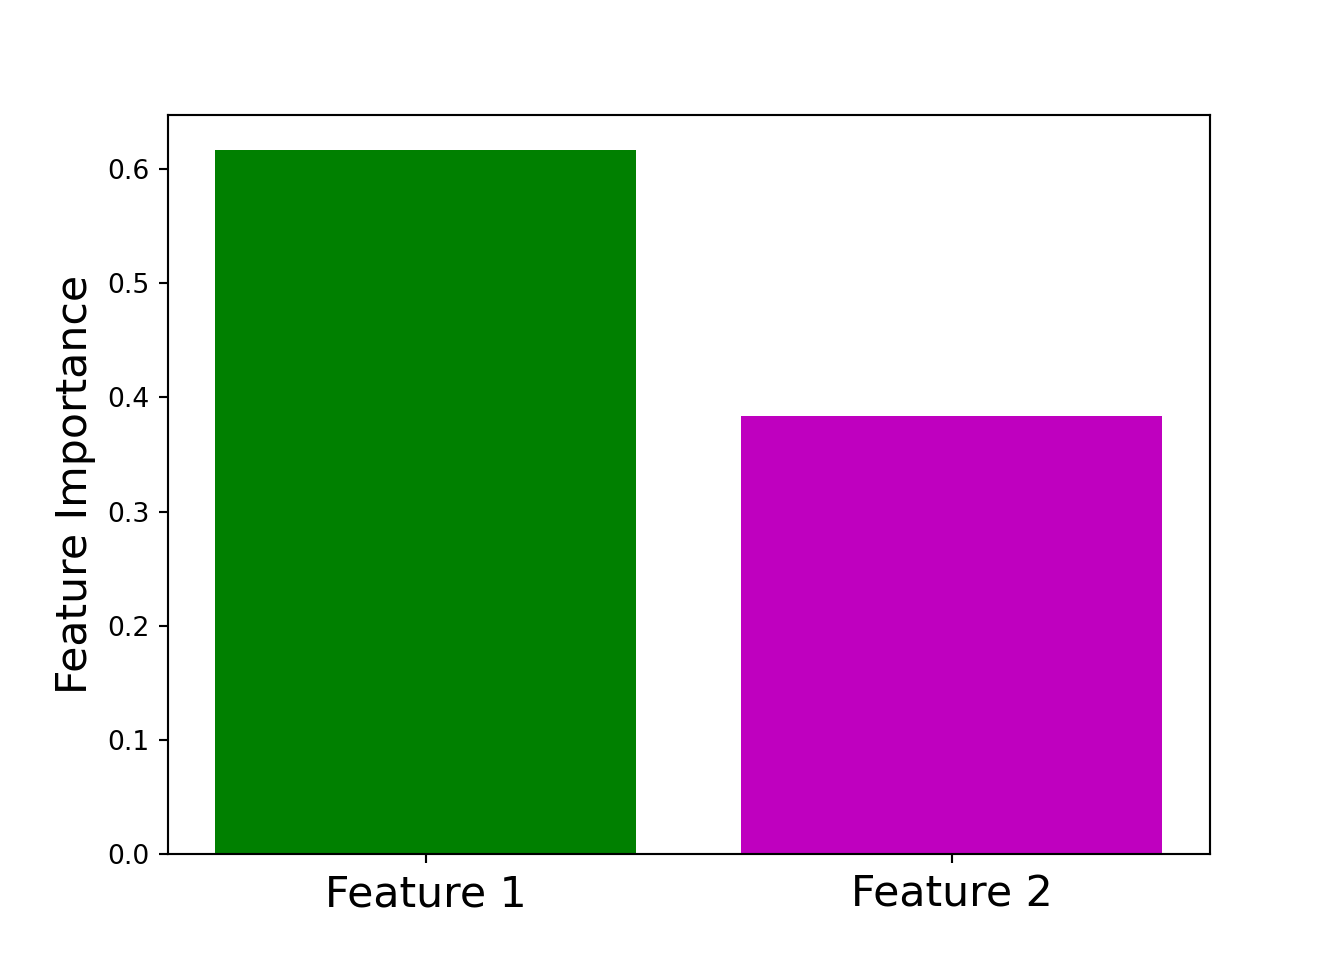

In this case, the predictions are based on a 61% contribution from
feature 1 and a 38% contribution from feature 2.

## Application

Now we pick the ‘Height’ and ‘Weight’ columns from the patients data to
predict the gender labels. We use a split of 4/5 of the data for
training and 1/5 for testing.

``` python
df = read_csv('data/patients_data.csv')

print(df.shape)

# Convert pounds to kg and inches to cm:
df['Weight'] = 0.454*df['Weight']
df['Height'] = 2.540*df['Height']

df.head(10)
```

    (100, 8)
       Age  Height  Weight  Systolic  Diastolic  Smoker  Gender  Peak Flow
    0   38  180.34  79.904       124         93       1    Male        200
    1   43  175.26  74.002       109         77       0    Male        615
    2   38  162.56  59.474       125         83       0  Female        642
    3   40  170.18  60.382       117         75       0  Female        511
    4   49  162.56  54.026       122         80       0  Female        497
    5   46  172.72  64.468       121         70       0  Female        528
    6   33  162.56  64.468       130         88       1  Female        269
    7   40  172.72  81.720       115         82       0    Male        324
    8   28  172.72  83.082       115         78       0    Male        501
    9   31  167.64  59.928       118         86       0  Female        723

### **Prepare training data and labels**

``` python
# Extract data as numpy array
df_np = df.to_numpy()

# Pick a fraction of height and weight data as training data
samples = 80

X = df_np[:samples, [1, 2]]

print(X.shape)
```

(80, 2)

For the labels of the training data we convert the ‘Male’ and ‘Female’
strings to categorical values.

``` python
gender_boolean = df['Gender'] == 'Female'

y = gender_boolean[:80]

# printed as 0 and 1:

y.astype('int')
```

0 0 1 0 2 1 3 1 4 1 .. 75 0 76 1 77 0 78 0 79 1 Name: Gender, Length:
80, dtype: int64

### **Train classifier and predict**

``` python
from sklearn.ensemble import RandomForestClassifier

seed(RANDOM_SEED)

clf = RandomForestClassifier(random_state=RANDOM_SEED)

clf.fit(X, y)
```

    RandomForestClassifier(random_state=1234)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

RandomForestClassifier

<a
href="https://scikit-learn.org/1.6/modules/generated/sklearn.ensemble.RandomForestClassifier.html"
class="sk-estimator-doc-link fitted" rel="noreferrer"
target="_blank">?<span>Documentation for
RandomForestClassifier</span></a><span class="sk-estimator-doc-link fitted">iFitted</span>

    RandomForestClassifier(random_state=1234)

We now take the remaining fifth of the data to predict.

``` python
X_test = df.loc[80:, ['Height', 'Weight']]

X_test = X_test.values

predict_test = clf.predict(X_test)

probab_test = clf.predict_proba(X_test)

print('Predictions: ', predict_test, '\n', 'Probabilities: ', '\n',  probab_test)
```

Predictions: \[False False False True True False True True True True
False False True False True False False False False False\]
Probabilities:  
\[\[1. 0. \] \[1. 0. \] \[1. 0. \] \[0. 1. \] \[0. 1. \] \[1. 0. \]
\[0. 1. \] \[0. 1. \] \[0. 1. \] \[0. 1. \] \[1. 0. \] \[1. 0. \] \[0.02
0.98\] \[1. 0. \] \[0. 1. \] \[1. 0. \] \[1. 0. \] \[1. 0. \] \[1. 0. \]
\[0.97 0.03\]\]

As in the example above, we create a state space grid to visualise the
outcome for the two features.

``` python
X1_min, X1_max = min(X[:, 0]), max(X[:, 0])
X2_min, X2_max = min(X[:, 1]), max(X[:, 1])

resolution = 100

vec_a = linspace(X1_min, X1_max, resolution)
vec_b = linspace(X2_min, X2_max, resolution)

grid_a, grid_b = meshgrid(vec_a, vec_b)


grid_a_flat = grid_a.ravel()
grid_b_flat = grid_b.ravel()

X_statespace = c_[grid_a_flat, grid_b_flat]
```

We can now obtain the categorical and probability predictions from the
trained classifier for all points of the grid.

``` python
predict = clf.predict(X_statespace)
probabs = clf.predict_proba(X_statespace)
```

Here is the plot of the state space and the predicted probabilities:

``` python
feature_1, feature_2 = 0, 1

fig, ax = subplots(ncols=3, nrows=1, figsize=(15, 5))

ax[0].scatter(X[:, feature_1], X[:, feature_2], c=y, s=40, cmap='bwr');
ax[0].set_xlim(X1_min, X1_max);
ax[0].set_ylim(X2_min, X2_max);
ax[0].set_xlabel('Feature 1', fontsize=16);
ax[0].set_ylabel('Feature 2', fontsize=16);

cax1 = ax[1].scatter(X_statespace[:, feature_1], X_statespace[:, feature_2], c=predict, s=1, cmap='bwr');
ax[1].scatter(X_test[:, feature_1], X_test[:, feature_2], c=predict_test, s=40, cmap='Greys');
ax[1].set_xlabel('Feature 1', fontsize=16);
ax[1].set_xlim(X1_min, X1_max);
ax[1].set_ylim(X2_min, X2_max);
fig.colorbar(cax1, ax=ax[1]);

grid_shape = grid_a.shape

probab_grid = probabs[:, 1].reshape(grid_shape)

# Subject with 170cm and 70 kg
pos1, pos2 = 170, 70

test_sample = [pos1, pos2]

contour_levels = linspace(0, 1, 10)

cax2 = ax[2].contourf(grid_a, grid_b, probab_grid, cmap='Greys', levels=contour_levels);
fig.colorbar(cax2, ax=ax[2]);

ax[2].scatter(test_sample[0], test_sample[1], c='r', marker='o', s=100);
ax[2].set_xlabel('Feature 1', fontsize=16);
ax[2].set_xlim(X1_min, X1_max);
ax[2].set_ylim(X2_min, X2_max);

show()
```

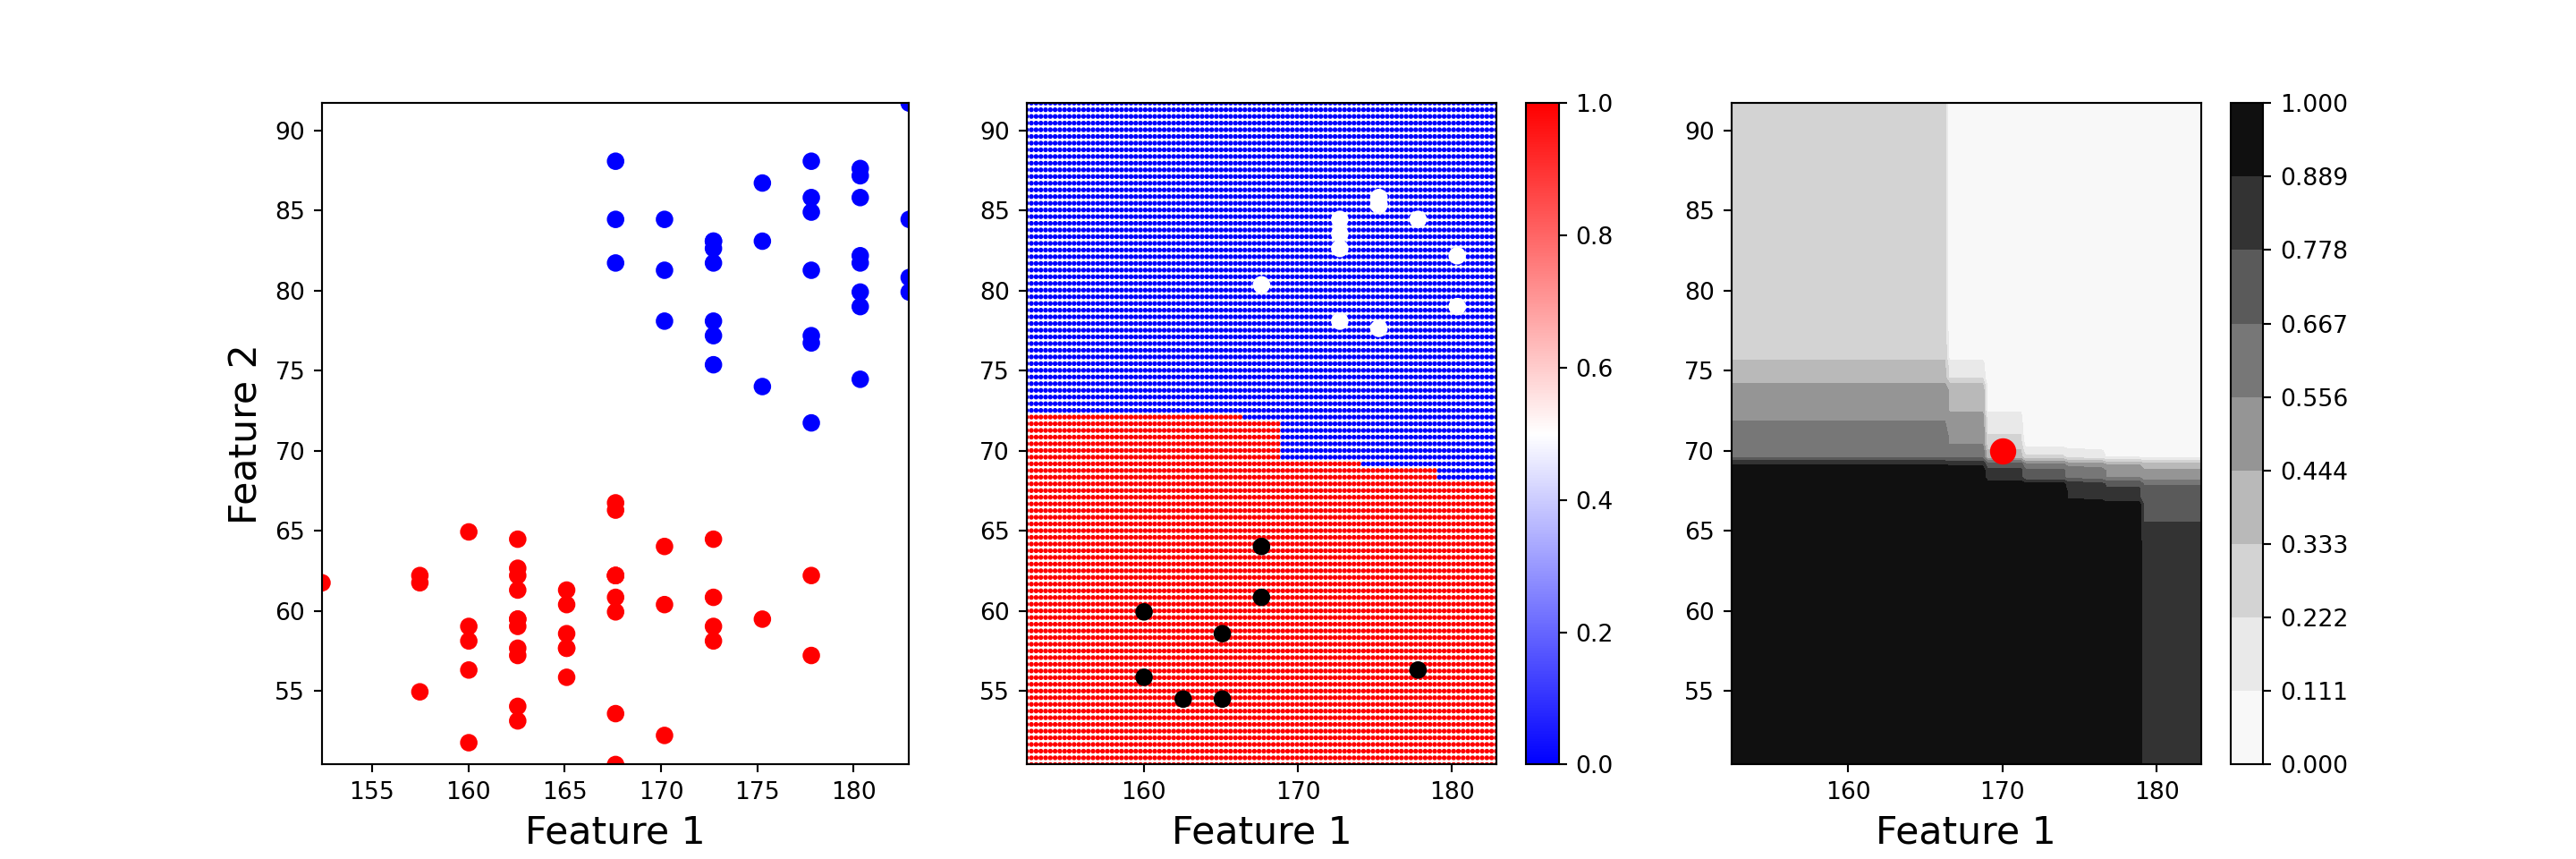

The left panel shows the original data with labels as colours, i.e. the
training data. Central panel shows the classified state space with the
test samples as black dots in predicted category ‘Female’ and white dots
in predicted category ‘Male’. Right panel shows the state space with
prediction probabilities with black for ‘Female’ and white for ‘Male’.
The red dot represents the simulated subject with 170cm and 70 kg (see
below).

### **Probability of a single observation**

Let us pick that subject and obtain its predicted label and probability.
Note the use of double brackets to create a sample that is a
two-dimensional array.

``` python
test_sample = [[pos1, pos2]]

test_predict = clf.predict(test_sample)
test_proba   = clf.predict_proba(test_sample)

print('Predicted class:', test_predict, 'Female')
print('Probability:', test_proba[0, 0])
print('')

bins = arange(test_proba.shape[1])

fig, ax = subplots()

ax.bar(bins, test_proba[0,:], color=('r', 'b'));
xticks(bins, ('Female', 'Male'), fontsize=16);
ax.set_ylabel('Probability', fontsize=16);

show()
```

    Predicted class: [False] Female
    Probability: 0.66

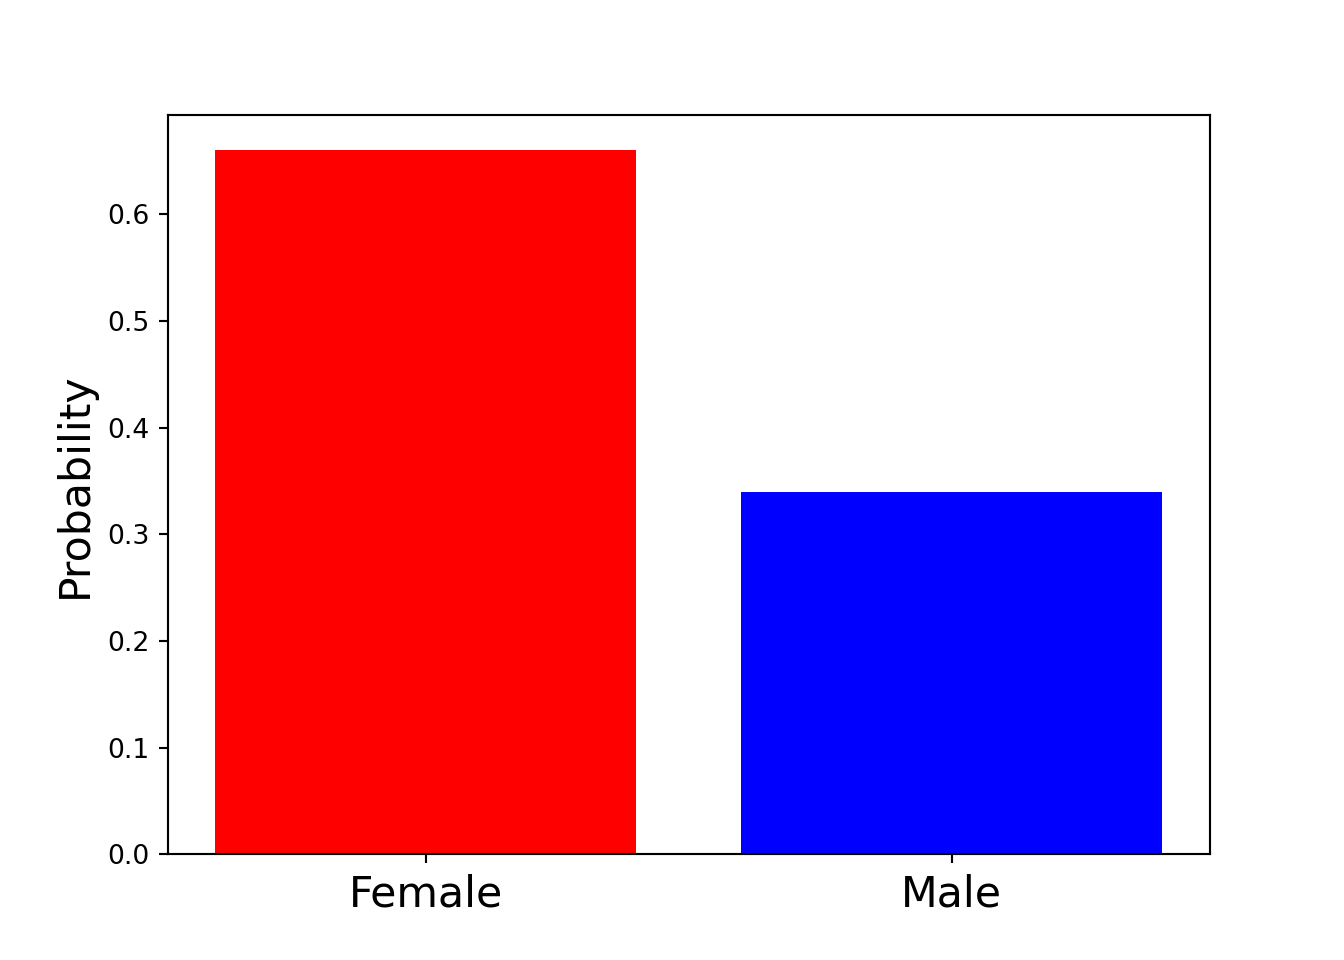

This shows that the predicted label is female but the probability is
less than 70 % and, e.g. if a clinical decision was to be taken based on
the outcome of the classification, it might suggest looking for
additional evidence before the decision is made.

### **Feature Importances**

``` python
importances = clf.feature_importances_

print('Features importances:')
template = 'Feature 1: {:.1f}%; Feature 2: {:.1f}%'
print(template.format(importances[0]*100, importances[1]*100))
print('')

bins = arange(importances.shape[0])

fig, ax = subplots()

ax.bar(bins, importances, color=('m', 'g'));
xticks(bins, ('Feature 1', 'Feature 2'), fontsize=16);
ax.set_ylabel('Feature Importance', fontsize=16);

show()
```

    Features importances:
    Feature 1: 31.7%; Feature 2: 68.3%

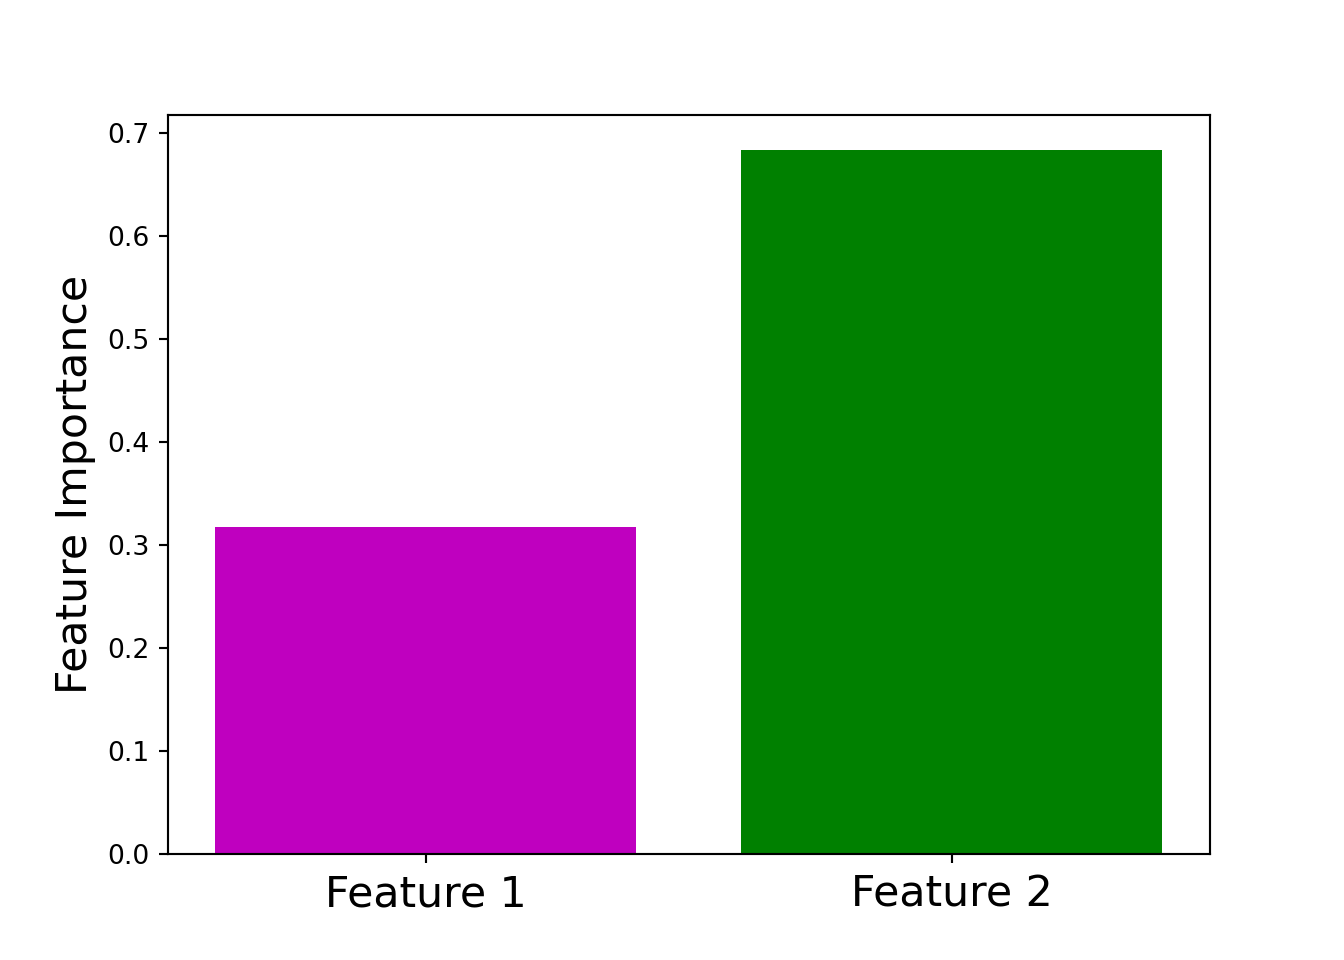

Feature Height contributes about one third and feature Weight about two
thirds to the decisions.

Feature importances can be used in data sets with many features, e.g. to
reduce the number of features used for classification. Some features
might not contribute to the classification and could therefore be left
out of the process.

In the next lesson, we are going to test multiple classifiers and
quantify their performance to improve the outcome of the classification.

  

## Exercises

#### End of chapter Exercises

Repeat the training and prediction workflow as above for two other
features in the data, namely: Systole and Diastole values. Use 70
training and 30 testing samples where the labels are assigned according
to the condition: 0 if ‘non-smoker’, 1 if ‘smoker’.

Use the above code to:

1.  Train the random forest classifier.

2.  Create state space plots with scatter plot, categorical colouring,
    and probability contour plot.

3.  Compare the predicted and actual labels to check how well the
    trained model performed: how many of the 30 test data points are
    correctly predicted?

4.  Plot the feature importance to check how much the systolic and
    diastolic values contributed to the predictions.

## Solutions are provided after assignments are marked.

## Further Practice: Iris data

You can try to use the Random Forest classifier on the [Iris
data](https://en.wikipedia.org/wiki/Iris_flower_data_set):

The Iris data are a collection of five features (sepal length, sepal
width, petal length, petal width and species) from 3 species of Iris
(Iris setosa, Iris virginica and Iris versicolor). The species name is
used for training in classification.

Import the data from
[scikit-learn](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)
as:

``` python
from sklearn import datasets

# Import Iris data
iris = datasets.load_iris()

# Get first two features and labels
X = iris.data[:, :2]
y = iris.target

print(X.shape, y.shape)
```

(150, 2) (150,)

-   Classification is to assign labels to unlabeled data.
-   `SciKit Learn` is an open source application programming interface
    (API) for machine learning.
-   `.fit()` function is used to receive the training data and perform
    the training of the model.
-   `.predict()` function helps to find out what the model claims these
    data to be.
-   `.predict_proba()` function predicts the probability of any
    predictions.

LS0tCnRpdGxlOiAiQ2xhc3NpZmljYXRpb24iCnRlYWNoaW5nOiAxMApleGVyY2lzZXM6IDIKLS0tCgpbKipEb3dubG9hZCBDaGFwdGVyIG5vdGVib29rIChpcHluYikqKl0oaHR0cHM6Ly9kcml2ZS51c2VyY29udGVudC5nb29nbGUuY29tL3UvMS91Yz9pZD0xNlQ4NXZickRZdTRaNjJyeUZBNXhWSHB3cmw3b2tJdnkmZXhwb3J0PWRvd25sb2FkKQoKWyoqRG93bmxvYWQgQ2hhcHRlciBQREYqKl0oaHR0cHM6Ly9kcml2ZS51c2VyY29udGVudC5nb29nbGUuY29tL3UvMS91Yz9pZD0xbmI2SG1OVVlDNFJYTUh2M2JWWTBOdkxCaWt3X2NIMG0mZXhwb3J0PWRvd25sb2FkKQoKWzxzcGFuIHN0eWxlPSJjb2xvcjogcmdiKDI1NSwgMCwgMCk7Ij4qKk1hbmRhdG9yeSBMZXNzb24gRmVlZGJhY2sgU3VydmV5Kio8L3NwYW4+XShodHRwczovL2RvY3MuZ29vZ2xlLmNvbS9mb3Jtcy9kL2UvMUZBSXBRTFNkcjBjYXBGN2psb0poUEgzUGtpMUIzTFpvS09HMTZwb09wdVZKN1NMMkxrd0xIUUEvdmlld2Zvcm0/cGxpPTEpCgpgYGB7ciBzZXR1cCwgaW5jbHVkZT1GQUxTRX0KbGlicmFyeShyZXRpY3VsYXRlKQoKIyBVbnNldCBhbnkgcHJldmlvdXNseSBzZXQgUHl0aG9uIGVudmlyb25tZW50cyB0byBhdm9pZCBjb25mbGljdHMKU3lzLnVuc2V0ZW52KCJSRVRJQ1VMQVRFX1BZVEhPTiIpCgojIENoZWNrIGlmIFBhbmRvYyBpcyBhdmFpbGFibGUKaWYgKCFmaWxlLmV4aXN0cygiL29wdC9ob21lYnJldy9iaW4vcGFuZG9jIikpIHsKICBzdG9wKCJQYW5kb2MgaXMgbm90IGZvdW5kLiBQbGVhc2UgaW5zdGFsbCBQYW5kb2Mgb3IgdXBkYXRlIHRoZSBwYXRoLiIpCn0KCiMgRHluYW1pY2FsbHkgc2V0IHRoZSBQeXRob24gZW52aXJvbm1lbnQKdHJ5Q2F0Y2goewogIHVzZV92aXJ0dWFsZW52KCIvVXNlcnMvQWRhbS8udmlydHVhbGVudnMvci1yZXRpY3VsYXRlIiwgcmVxdWlyZWQgPSBUUlVFKQogIGNhdCgiUHl0aG9uIGVudmlyb25tZW50IHNldCBzdWNjZXNzZnVsbHkuXG4iKQp9LCBlcnJvciA9IGZ1bmN0aW9uKGUpIHsKICBjYXQoIkVycm9yIHNldHRpbmcgUHl0aG9uIGVudmlyb25tZW50OiIsIGUkbWVzc2FnZSwgIlxuIikKICBzdG9wKCJGYWlsZWQgdG8gc2V0IFB5dGhvbiBlbnZpcm9ubWVudC4iKQp9KQoKIyBWYWxpZGF0ZSBQeXRob24gZW52aXJvbm1lbnQKdHJ5Q2F0Y2goewogIHB5X2NvbmZpZygpCiAgcHlfcnVuX3N0cmluZygiaW1wb3J0IG51bXB5IikgICMgQ2hlY2sgZm9yIG51bXB5IGF2YWlsYWJpbGl0eQogIGNhdCgiUHl0aG9uIGVudmlyb25tZW50IGFuZCBudW1weSBhcmUgY29ycmVjdGx5IGNvbmZpZ3VyZWQuXG4iKQp9LCBlcnJvciA9IGZ1bmN0aW9uKGUpIHsKICBjYXQoIkVycm9yIGluIFB5dGhvbiBlbnZpcm9ubWVudCBjb25maWd1cmF0aW9uIG9yIG51bXB5IGNoZWNrOiIsIGUkbWVzc2FnZSwgIlxuIikKICBzdG9wKCJGYWlsZWQgdG8gdmFsaWRhdGUgUHl0aG9uIGVudmlyb25tZW50LiIpCn0pCgojIENvbmZpZ3VyZSBrbml0ciBjaHVua3MgdG8gZW5zdXJlIFB5dGhvbiBjb2RlIGlzIGV4ZWN1dGVkIGNvcnJlY3RseQprbml0cjo6b3B0c19jaHVuayRzZXQoCiAgZXZhbCA9IFRSVUUsICAgICMgRXhlY3V0ZSB0aGUgY29kZSBjaHVua3MKICBlY2hvID0gVFJVRSwgICAgIyBEaXNwbGF5IHRoZSBjb2RlIGNodW5rcyBpbiB0aGUgZmluYWwgb3V0cHV0CiAgbWVzc2FnZSA9IEZBTFNFLCAgIyBTdXBwcmVzcyBtZXNzYWdlcyBmcm9tIGJlaW5nIHNob3duCiAgd2FybmluZyA9IEZBTFNFLCAgIyBTdXBwcmVzcyB3YXJuaW5ncyBmcm9tIGJlaW5nIHNob3duCiAgcmVzdWx0cyA9ICdhc2lzJywgICMgRW5zdXJlIG91dHB1dCBpcyBoYW5kbGVkIHByb3Blcmx5CiAgZW5naW5lID0gInB5dGhvbiIgICMgVXNlIFB5dGhvbiBlbmdpbmUgZm9yIHJlbGV2YW50IGNodW5rcwopCgpjYXQoIlNldHVwIGNodW5rIGNvbXBsZXRlLlxuIikKYGBgCgoKOjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OjogcXVlc3Rpb25zCgotIEhvdyB0byBwcmVwYXJlIGRhdGEgZm9yIGNsYXNzaWZpY2F0aW9uPwotIFdoeSBkbyB3ZSBuZWVkIHRvIHRyYWluIGEgbW9kZWw/Ci0gV2hhdCBkb2VzIGEgc3RhdGUgc3BhY2UgcGxvdCByZXByZXNlbnQ/Ci0gSG93IHRvIG9idGFpbiBwcmVkaWN0aW9uIHByb2JhYmlsaXRpZXM/Ci0gV2hhdCBhcmUgdGhlIGltcG9ydGFudCBmZWF0dXJlcz8KCjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OgoKOjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OiBvYmplY3RpdmVzCgotIFVuZGVyc3RhbmRpbmcgdGhlIGNsYXNzaWZpY2F0aW9uIGNoYWxsZW5nZS4KLSBUcmFpbmluZyBhIGNsYXNzaWZpZXIgbW9kZWwuCi0gVW5kZXJzdGFuZGluZyB0aGUgc3RhdGUgc3BhY2UgcGxvdCBvZiBtb2RlbCBwcmVkaWN0aW9ucy4KLSBPYnRhaW5pbmcgcHJlZGljdGlvbiBwcm9iYWJpbGl0aWVzLgotIEZpbmRpbmcgaW1wb3J0YW50IGZlYXR1cmVzLgoKOjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6CgoKOjo6Ojo6Ojo6Ojo6Ojo6Ojo6IHByZXJlcQotIFtEYXRhIEhhbmRsaW5nXShodHRwczovL2xlYXJudG9kaXNjb3Zlci5naXRodWIuaW8vRGF0YV9IYW5kbGluZy8pCi0gW051bXB5IGFycmF5cyAoc2VlIGFjY29tcGFueWluZyB0dXRvcmlhbCldKHNldHVwLm1kI251bXB5KQotIFtCYXNpYyBNYXRwbG90bGliIHBsb3R0aW5nXShodHRwczovL21hdHBsb3RsaWIub3JnKQo6Ojo6Ojo6Ojo6Ojo6Ojo6OjoKCjxwIGFsaWduID0gImNlbnRlciI+CjxpZnJhbWUgd2lkdGg9IjU2MCIgaGVpZ2h0PSIzMTUiIHNyYz0iaHR0cHM6Ly93d3cueW91dHViZS5jb20vZW1iZWQvTklVMUpPMjZKZ2siIHRpdGxlPSJZb3VUdWJlIHZpZGVvIHBsYXllciIgZnJhbWVib3JkZXI9IjAiIGFsbG93PSJhY2NlbGVyb21ldGVyOyBhdXRvcGxheTsgY2xpcGJvYXJkLXdyaXRlOyBlbmNyeXB0ZWQtbWVkaWE7IGd5cm9zY29wZTsgcGljdHVyZS1pbi1waWN0dXJlIiBhbGxvd2Z1bGxzY3JlZW4+PC9pZnJhbWU+CjwvcD4KPGJyPgo8cCBhbGlnbiA9ICJjZW50ZXIiPgo8aWZyYW1lIHdpZHRoPSI1NjAiIGhlaWdodD0iMzE1IiBzcmM9Imh0dHBzOi8vd3d3LnlvdXR1YmUuY29tL2VtYmVkLzNmNjI3d1hLNnowIiB0aXRsZT0iWW91VHViZSB2aWRlbyBwbGF5ZXIiIGZyYW1lYm9yZGVyPSIwIiBhbGxvdz0iYWNjZWxlcm9tZXRlcjsgYXV0b3BsYXk7IGNsaXBib2FyZC13cml0ZTsgZW5jcnlwdGVkLW1lZGlhOyBneXJvc2NvcGU7IHBpY3R1cmUtaW4tcGljdHVyZSIgYWxsb3dmdWxsc2NyZWVuPjwvaWZyYW1lPgo8L3A+Cjxicj4KPHAgYWxpZ24gPSAiY2VudGVyIj4KPGlmcmFtZSB3aWR0aD0iNTYwIiBoZWlnaHQ9IjMxNSIgc3JjPSJodHRwczovL3d3dy55b3V0dWJlLmNvbS9lbWJlZC9FVXJ4cE1yNWJHNCIgdGl0bGU9IllvdVR1YmUgdmlkZW8gcGxheWVyIiBmcmFtZWJvcmRlcj0iMCIgYWxsb3c9ImFjY2VsZXJvbWV0ZXI7IGF1dG9wbGF5OyBjbGlwYm9hcmQtd3JpdGU7IGVuY3J5cHRlZC1tZWRpYTsgZ3lyb3Njb3BlOyBwaWN0dXJlLWluLXBpY3R1cmUiIGFsbG93ZnVsbHNjcmVlbj48L2lmcmFtZT4KPC9wPgo8YnI+CgojIyMgKipJbXBvcnQgZnVuY3Rpb25zKioKYGBge3B5dGhvbn0KZnJvbSBwYW5kYXMgaW1wb3J0IHJlYWRfY3N2Cgpmcm9tIG51bXB5IGltcG9ydCBhcmFuZ2UsIGFzYXJyYXksIGxpbnNwYWNlLCBjXywgbWVzaGdyaWQsIHplcm9zLCBvbmVzCgpmcm9tIG51bXB5LnJhbmRvbSBpbXBvcnQgdW5pZm9ybSwgc2VlZAoKZnJvbSBtYXRwbG90bGliLnB5cGxvdCBpbXBvcnQgc3VicGxvdHMsIHNjYXR0ZXIsIHhsYWJlbCwgeWxhYmVsLCB4dGlja3MsIHNob3cKCmBgYAoKIyMgRXhhbXBsZTogVmlzdWFsIENsYXNzaWZpY2F0aW9uCgpJbXBvcnQgdGhlICdwYXRpZW50c19kYXRhJyB0b3kgZGF0YXNldCBhbmQgc2NhdHRlciB0aGUgZGF0YSBmb3IgSGVpZ2h0IGFuZCBXZWlnaHQuCgpgYGB7cHl0aG9uLCByZXN1bHRzID0gImhvbGQifQojIFBsZWFzZSBhZGp1c3QgeW91ciBwYXRoIHRvIHRoZSBmaWxlCmRmID0gcmVhZF9jc3YoJ2RhdGEvcGF0aWVudHNfZGF0YS5jc3YnKQoKcHJpbnQoZGYuc2hhcGUpCgojIENvbnZlcnQgaW5jaGVzIHRvIGNtIGFuZCBwb3VuZHMgdG8ga2c6CmRmWydIZWlnaHQnXSA9IDIuNTQwKmRmWydIZWlnaHQnXQpkZlsnV2VpZ2h0J10gPSAwLjQ1NCpkZlsnV2VpZ2h0J10KCmRmLmhlYWQoMTApCgpgYGAKCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+Ck5vdGUgdGhhdCBkYXRhIGluIHRoZSBmaXJzdCBmaXZlIGNvbHVtbnMgYXJlIGVpdGhlciBpbnRlZ2VycyAoYWdlKSBvciByZWFsIG51bWJlcnMgKGZsb2F0aW5nIHBvaW50KS4gVGhlIGNsYXNzZXMgKGNhdGVnb3JpY2FsIGRhdGEpIGluIHRoZSBsYXN0IHR3byBjb2x1bW5zIGNvbWUgYXMgYmluYXJ5ICgwLzEpIGZvciAnc21va2Vycy9ub24tc21va2VycycgYW5kIGFzIHN0cmluZ3MgZm9yICdtYWxlL2ZlbWFsZScuIEJvdGggY2FuIGJlIHVzZWQgZm9yIGNsYXNzaWZpY2F0aW9uLgo8L3A+CgoKOjo6Ojo6Ojo6Ojo6Ojo6Ojo6OjogY2hhbGxlbmdlCiMjIFRoZSBjbGFzc2lmaWNhdGlvbiBjaGFsbGVuZ2UKCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+CkkgYW0gZ2l2ZW4gYSBzZXQgb2YgZGF0YSBmcm9tIGEgc2luZ2xlIHN1YmplY3QgYW5kIGZlZWQgdGhlbSB0byBhIGNvbXB1dGF0aW9uYWwgbW9kZWwuIFRoZSBtb2RlbCB0aGVuIHByZWRpY3RzIHRvIHdoYXQgKHByZWRlZmluZWQpIF9jbGFzc18gdGhpcyBzdWJqZWN0IGJlbG9uZ3MuIEV4YW1wbGU6IGdpdmVuIGhlaWdodCBhbmQgd2VpZ2h0IGRhdGEsIHRoZSBtb2RlbCBtaWdodCB0cnkgdG8gcHJlZGljdCB3aGV0aGVyIHRoZSBzdWJqZWN0IGlzIGEgc21va2VyIG9yIGEgbm9uLXNtb2tlci4gQSBuYWl2ZSBtb2RlbCB3aWxsLCBvZiBjb3Vyc2UsIG5vdCBiZSBhYmxlIHRvIHByZWRpY3QgcmVhc29uYWJseS4gVGhlIF9zdXBlcnZpc2VkXyBhcHByb2FjaCBpbiBtYWNoaW5lIGxlYXJuaW5nIGlzIHRvIHByb3ZpZGUgdGhlIG1vZGVsIHdpdGggYSBzZXQgb2YgZGF0YSB3aGVyZSB0aGUgY2xhc3MgaGFzIGJlZW4gdmVyaWZpZWQgYmVmb3JlaGFuZCBhbmQgdGhlIG1vZGVsIGNhbiB0ZXN0IGl0cyAoaW5pdGlhbGx5IHJhbmRvbSkgcHJlZGljdGlvbnMgYWdhaW5zdCB0aGUgcHJvdmlkZWQgY2xhc3MuIEFuIG9wdGltaXNhdGlvbiBhbGdvcml0aG0gaXMgdGhlbiBydW4gdG8gYWRqdXN0IHRoZSAoaW50ZXJuYWwpIG1vZGVsIHNldHRpbmcgc3VjaCB0aGF0IHRoZSBwcmVkaWN0aW9ucyBpbXByb3ZlIGFzIG11Y2ggYXMgcG9zc2libGUuIFdoZW4gbm8gZnVydGhlciBpbXByb3ZlbWVudCBpcyBhY2hpZXZlZCwgdGhlIGFsZ29yaXRobSBzdG9wcy4gVGhlIG1vZGVsIGlzIHRoZW4gX3RyYWluZWRfIGFuZCByZWFkeSB0byBwcmVkaWN0Lgo8L3A+Cgo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OgoKPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KVGhlIGFjdCBvZiBjbGFzc2lmaWNhdGlvbiBpcyB0byBhc3NpZ24gbGFiZWxzIHRvIHVubGFiZWxsZWQgZGF0YSBhZnRlciBtb2RlbCBleHBvc3VyZSB0byBwcmV2aW91c2x5IGxhYmVsbGVkIGRhdGEgKGUuZy4gYmFzZWQgb24gbWVkaWNhbCBrbm93bGVkZ2UgaW4gdGhlIGNhc2Ugb2YgZGlzZWFzZSBkYXRhKS4KPC9wPgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpJbiBjb250cmFzdCwgaW4gX3Vuc3VwZXJ2aXNlZCBtYWNoaW5lIGxlYXJuaW5nXyB0aGUgYXNzaWdubWVudCBpcyBkb25lIGJhc2VkIG9uIGV4cG9zdXJlIHRvIHVubGFiZWxsZWQgZGF0YSBmb2xsb3dpbmcgYSBzZWFyY2ggZm9yIGRpc3RpbmN0aXZlIGZlYXR1cmVzIG9yICdzdHJ1Y3R1cmUnIGluIHRoZSBkYXRhLgo8L3A+CjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+CldlIGNhbiBmaXJzdCBjaGVjayBpZiB3ZSBhcmUgYWJsZSB0byBkaXN0aW5ndWlzaCBjbGFzc2VzIHZpc3VhbGx5LiBGb3IgdGhpcywgd2Ugc2NhdHRlciB0aGUgZGF0YSBvZiB0d28gY29sdW1ucyBvZiBhIGRhdGFmcmFtZSB1c2luZyB0aGUgY29sdW1uIG5hbWVzLiBUaGF0IGlzLCB3ZSBsb29rIGF0IHRoZSBkaXN0cmlidXRpb24gb2YgcG9pbnRzIGluIGEgcGxhbmUuIFRoZW4gd2UgdXNlIHRoZSBjbGFzcyBfX2xhYmVsX18gdG8gY29sb3IgZWFjaCBwb2ludCBpbiB0aGUgcGxhbmUgYWNjb3JkaW5nIHRvIHRoZSBjbGFzcyBpdCBiZWxvbmdzIHRvLiBTdHJpbmcgbGFiZWxzIGxpa2UgJ21hbGUnIC8gJ2ZlbWFsZScgZmlyc3QgbmVlZCB0byBiZSBjb252ZXJ0ZWQgdG8gQm9vbGVhbiAoYmluYXJ5KS4gMC8xIGxhYmVscyBhcyBpbiB0aGUgJ3Ntb2tlcnMvbm9uLXNtb2tlcnMnIGNvbHVtbiBjYW4gYmUgdXNlZCBkaXJlY3RseS4KPC9wPgoKTGV0IHVzIHBsb3QgdGhlIGhlaWdodC13ZWlnaHQgZGF0YSBhbmQgbGFiZWwgdGhlbSBmb3IgYm90aCBjYXNlcy4KCmBgYHtweXRob259CmZpZywgYXggPSBzdWJwbG90cyhmaWdzaXplPSgxMiw2KSxuY29scz0yLG5yb3dzPTEpCgpnZW5kZXJfYm9vbGVhbiA9IGRmWydHZW5kZXInXSA9PSAnRmVtYWxlJwoKYXhbMF0uc2NhdHRlcihkZlsnSGVpZ2h0J10sIGRmWydXZWlnaHQnXSwgYz1nZW5kZXJfYm9vbGVhbiwgY21hcD0nYndyJykKYXhbMF0uc2V0X3hsYWJlbCgnSGVpZ2h0JywgZm9udHNpemU9MTQpCmF4WzBdLnNldF95bGFiZWwoJ1dlaWdodCcsIGZvbnRzaXplPTE0KQpheFswXS5zZXRfdGl0bGUoJ0ZlbWFsZSAocmVkKSwgTWFsZSAoYmx1ZSknLCBmb250c2l6ZT0xNikKCmF4WzFdLnNjYXR0ZXIoZGZbJ0hlaWdodCddLCBkZlsnV2VpZ2h0J10sIGM9ZGZbJ1Ntb2tlciddLCBjbWFwPSdid3InKQpheFsxXS5zZXRfeGxhYmVsKCdIZWlnaHQnLCBmb250c2l6ZT0xNikKYXhbMV0uc2V0X3lsYWJlbCgnV2VpZ2h0JywgZm9udHNpemU9MTYpCmF4WzFdLnNldF90aXRsZSgnU21va2VyIChyZWQpLCBOb24tU21va2VyIChibHVlKScsIGZvbnRzaXplPTE2KTsKCnNob3coKQpgYGAKCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+Ckl0IGFwcGVhcnMgZnJvbSB0aGVzZSBncmFwaHMgdGhhdCBiYXNlZCBvbiBoZWlnaHQgYW5kIHdlaWdodCBkYXRhIGl0IGlzIHBvc3NpYmxlIHRvIGRpc3Rpbmd1aXNoIG1hbGUgYW5kIGZlbWFsZS4gQmFzZWQgb24gdmlzdWFsIGluc3BlY3Rpb24gb25lIGNvdWxkIGNvbmNsdWRlIHRoYXQgZXZlcnlib2R5IHdpdGggYSB3ZWlnaHQgbG93ZXIgdGhhbiA3MGtnIGlzIGZlbWFsZSBhbmQgZXZlcnlib2R5IHdpdGggYSB3ZWlnaHQgYWJvdmUgNzBrZyBpcyBtYWxlLiBUaGF0IHdvdWxkIGJlIGEgY2xhc3NpZmljYXRpb24gYmFzZWQgb24gdGhlIHdlaWdodCBhbG9uZS4gSXQgYWxzbyBhcHBlYXJzIHRoYXQgdGhlIGRhdGEgcG9pbnRzIGNsYXNzaWZpZWQgYXMgJ21hbGUnIGFyZSB0YWxsZXIgb24gYXZlcmFnZSwgc28gaXQgbWlnaHQgYmUgaGVscGZ1bCB0byBoYXZlIHRoZSBoZWlnaHQgcmVjb3JkZWQgYXMgd2VsbC4gRS5nIGl0IGNvdWxkIGltcHJvdmUgdGhlIHByZWRpY3Rpb24gb2YgZ2VuZGVyIGZvciBuZXcgc3ViamVjdHMgd2l0aCBhIHdlaWdodCBhcm91bmQgNzAga2cuIEJ1dCBpdCB3b3VsZCBub3QgYmUgdGhlIGJlc3QgY2hvaWNlIGlmIG9ubHkgYSBzaW5nbGUgcXVhbnRpdHkgd2FzIHVzZWQuIFRodXMsIGEgc2Vjb25kIGNvbmNsdXNpb24gaXMgdGhhdCBiYXNlZCBvbiB0aGVzZSBkYXRhIHRoZSB3ZWlnaHQgaXMgbW9yZSBpbXBvcnRhbnQgZm9yIHRoZSBjbGFzc2lmaWNhdGlvbiB0aGFuIHRoZSBoZWlnaHQuCjwvcD4KCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+Ck9uIHRoZSBvdGhlciBoYW5kLCBiYXNlZCBvbiB0aGUgc21va2VyIC8gbm9uLXNtb2tlciBkYXRhIGl0IHdpbGwgbm90IGJlIHBvc3NpYmxlIHRvIGRpc3Rpbmd1aXNoIHNtb2tlcnMgZnJvbSBub24tc21va2Vycy4gUmVkIGRvdHMgYW5kIGJsdWUgZG90cyBhcmUgc2NhdHRlcmVkIHRocm91Z2hvdXQgdGhlIGdyYXBoLiBUaGUgY29uY2x1c2lvbiBpcyB0aGF0IGhlaWdodCBhbmQgd2VpZ2h0IGNhbm5vdCBiZSB1c2VkIHRvIHByZWRpY3Qgd2hldGhlciBhIHN1YmplY3QgaXMgYSBzbW9rZXIuCjwvcD4KCiMjIFN1cGVydmlzZWQgTGVhcm5pbmc6IFRyYWluaW5nIGEgTW9kZWwKPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KVGhpcyBsZXNzb24gZGVhbHMgd2l0aCBsYWJlbGxlZCBkYXRhLiBMYWJlbGxlZCBkYXRhIGFyZSBudW1lcmljYWwgZGF0YSB3aXRoIGFuIGV4dHJhIGNvbHVtbiBvZiBhIF9fbGFiZWxfXyBmb3IgZWFjaCBzYW1wbGUuIEEgc2FtcGxlIGNhbiBjb25zaXN0IG9mIGFueSBudW1iZXIgb2YgaW5kaXZpZHVhbCBvYnNlcnZhdGlvbnMgYnV0IG11c3QgYmUgYXQgbGVhc3QgdHdvLgo8L3A+CkV4YW1wbGVzIG9mIGxhYmVscyBpbmNsdWRlICdjb250cm9sIGdyb3VwIC8gdGVzdCBncm91cCc7ICdtYWxlIC8gZmVtYWxlJzsgJ2hlYWx0aHkgLyBkaXNlYXNlZCc7ICdiZWZvcmUgdHJlYXRtZW50IC8gYWZ0ZXIgdHJlYXRtZW50Jy4KPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KVGhlIHRhc2sgaW4gU3VwZXJ2aXNlZCBNYWNoaW5lIExlYXJuaW5nIGlzIHRvIGZpdCAodHJhaW4pIGEgbW9kZWwgdG8gZGlzdGluZ3Vpc2ggYmV0d2VlbiB0aGUgZ3JvdXBzIGJ5ICdsZWFybmluZycgZnJvbSBzby1jYWxsZWQgdHJhaW5pbmcgZGF0YS4gQWZ0ZXIgdHJhaW5pbmcsIHRoZSBvcHRpbWlzZWQgbW9kZWwgYXV0b21hdGljYWxseSBsYWJlbHMgaW5jb21pbmcgKHVubGFiZWxlZCkgZGF0YS4gVGhlIGJldHRlciB0aGUgbW9kZWwsIHRoZSBiZXR0ZXIgdGhlIGxhYmVsbGluZyAocHJlZGljdGlvbikuCjwvcD4KPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KVGhlIG1vZGVsIGl0c2VsZiBpcyBhIGJsYWNrIGJveC4gSXQgaGFzIHNldCBkZWZhdWx0IHBhcmFtZXRlcnMgdG8gc3RhcnQgd2l0aCBhbmQgdGh1cyBwZXJmb3JtcyBiYWRseSBpbiB0aGUgYmVnaW5uaW5nLiBFc3NlbnRpYWxseSwgaXQgc3RhcnRzIGJ5IHByZWRpY3RpbmcgYSBsYWJlbCBhdCByYW5kb20uIFRoZSBwcm9jZXNzIG9mIHRyYWluaW5nIGNvbnNpc3RzIGluIHJlcGVhdGVkbHkgY2hhbmdpbmcgdGhlIG1vZGVsIHBhcmFtZXRlcnMgc3VjaCB0aGF0IHRoZSBwZXJmb3JtYW5jZSBpbXByb3Zlcy4gQWZ0ZXIgdGhlIHRyYWluaW5nLCB0aGUgbW9kZWwgcGFyYW1ldGVycyBhcmUgc3VwcG9zZWQgdG8gYmUgb3B0aW1hbC4gT2YgY291cnNlLCB0aGUgbW9kZWwgY2Fubm90IGJlIGV4cGVjdGVkIHRvIHJldmVhbCBhbnl0aGluZyBhYm91dCB0aGUgbWVjaGFuaXNtIG9yIGNhdXNlIHRoYXQgdW5kZXJsaWVzIHRoZSBkaXN0aW5jdGlvbiBiZXR3ZWVuIHRoZSBsYWJlbHMuCjwvcD4KVGhlIHBlcmZvcm1hbmNlIG9mIHRoZSBtb2RlbCBpcyB0ZXN0ZWQgYnkgc3BsaXR0aW5nIGEgZGF0YXNldCB3aXRoIGxhYmVscyBpbnRvOgoKLSB0aGUgYHRyYWluIGRhdGFgLCB0aG9zZSB0aGF0IHdpbGwgYmUgdXNlZCBmb3IgbW9kZWwgZml0dGluZywgYW5kCgotIHRoZSBgdGVzdCBkYXRhYCwgdGhvc2UgdGhhdCB3aWxsIGJlIHVzZWQgdG8gY2hlY2sgaG93IHdlbGwgdGhlIG1vZGVsIHByZWRpY3RzLgoKPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KVGhlIHJlc3VsdCBvZiB0aGUgbW9kZWwgZml0dGluZyBpcyB0aGVuIGFzc2Vzc2VkIGJ5IGNoZWNraW5nIGhvdyBtYW55IG9mIHRoZSAod2l0aGhlbGQpIGxhYmVscyBpbiB0aGUgdGVzdCBkYXRhIHdlcmUgY29ycmVjdGx5IHByZWRpY3RlZCBieSB0aGUgdHJhaW5lZCBtb2RlbC4gV2UgY2FuIGFsc28gcmV0cmlldmUgdGhlIGNvbmZpZGVuY2Ugb2YgdGhlIG1vZGVsIHByZWRpY3Rpb24sIGkuZS4gdGhlIHByb2JhYmlsaXR5IHRoYXQgdGhlIGFzc2lnbmVkIGxhYmVsIGlzIGNvcnJlY3QuCjwvcD4KPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KQXMgYW4gYWRkaXRpb25hbCByZXN1bHQsIHRoZSBwcm9jZWR1cmUgd2lsbCBnZW5lcmF0ZSB0aGUgc28tY2FsbGVkIGZlYXR1cmUgaW1wb3J0YW5jZXM6IHNpbWlsYXIgdG8gaG93IHdlIGNvbmNsdWRlZCBhYm92ZSB0aGF0IHdlaWdodCBpcyBtb3JlIGltcG9ydGFudCB0aGFuIGhlaWdodCBmb3IgZ2VuZGVyIHByZWRpY3Rpb24sIHRoZSBmZWF0dXJlIGltcG9ydGFuY2UgaW5mb3JtcyB0byB3aGljaCBkZWdyZWUgZWFjaCBvZiB0aGUgZGF0YSBjb2x1bW5zIGFjdHVhbGx5IGNvbnRyaWJ1dGVzIHRvIHRoZSBwcmVkaWN0aW9ucy4KPC9wPgoKIyMgU2Npa2l0IExlYXJuCgpXZSB3aWxsIGltcG9ydCBvdXIgbWFjaGluZSBsZWFybmluZyBmdW5jdGlvbmFsaXR5IGZyb20gdGhlIFtTY2lLaXQgTGVhcm4gbGlicmFyeV0oaHR0cHM6Ly9zY2lraXQtbGVhcm4ub3JnL3N0YWJsZS8pLgoKOjo6Ojo6Ojo6Ojo6Ojo6Ojo6IGNhbGxvdXQKIyMgU2NpS2l0IExlYXJuCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+ClNjaUtpdCBMZWFybiBpcyBhIHJlbm93bmVkIG9wZW4gc291cmNlIGFwcGxpY2F0aW9uIHByb2dyYW1taW5nIGludGVyZmFjZSAoQVBJKSBmb3IgbWFjaGluZSBsZWFybmluZy4gSXQgZW5qb3lzIGEgdmlicmFudCBjb21tdW5pdHkgYW5kIGlzIHdlbGwgbWFpbnRhaW5lZC4gSXQgaXMgYWx3YXlzIGJlbmVmaWNpYWwgdG8gdXNlIHRoZSBvZmZpY2lhbCBkb2N1bWVudGF0aW9ucyBmb3IgZXZlcnkgQVBJLiBTY2lLaXQgTGVhcm4gcHJvdmlkZXMgYW4gZXhjZXB0aW9uYWwgZG9jdW1lbnRhdGlvbiB3aXRoIGRldGFpbGVkIGV4cGxhbmF0aW9ucyBhbmQgZXhhbXBsZXMgYXQgZXZlcnkgbGV2ZWwuCjwvcD4KCjo6Ojo6Ojo6Ojo6Ojo6Ojo6OgoKPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KVGhlIGltcGxlbWVudGF0aW9uIG9mIGFsZ29yaXRobXMgaW4gU2NpS2l0IExlYXJuIGZvbGxvd3MgYSB2ZXJ5IHNwZWNpZmljIHByb3RvY29sLiBGaXJzdCBhbmQgZm9yZW1vc3QsIGl0IHVzZXMgYSBwcm9ncmFtbWluZyBwYXJhZGlnbSBrbm93biBhcyBvYmplY3Qtb3JpZW50ZWQgcHJvZ3JhbW1pbmcgKE9PUCkuIFRoYW5rcyB0byBQeXRob24sIHRoaXMgZG9lcyBub3QgbWVhbiB0aGF0IHlvdSBhcyB0aGUgdXNlciBhcmUgYWxzbyBmb3JjZWQgdG8gdXNlIE9PUC4gQnV0IHlvdSBuZWVkIHRvIGZvbGxvdyBhIHNwZWNpZmljIHByb3RvY29sIHRvIHVzZSB0aGUgdG9vbHMgdGhhdCBhcmUgcHJvdmlkZWQgYnkgU2NpS2l0IExlYXJuLgo8L3A+CjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+ClVubGlrZSBmdW5jdGlvbnMgdGhhdCBwZXJmb3JtIGEgc3BlY2lmaWMgdGFzayBhbmQgcmV0dXJuIHRoZSByZXN1bHRzLCBpbiBPT1AsIHdlIHVzZSBfY2xhc3Nlc18gdG8gZW5jYXBzdWxhdGUgaW50ZXJjb25uZWN0ZWQgY29tcG9uZW50cyBhbmQgZnVuY3Rpb25hbGl0aWVzLiBJbiBhY2NvcmRhbmNlIHdpdGggdGhlIGNvbnZlbnRpb24gb2YgYmVzdCBwcmFjdGljZXMgZm9yIFB5dGhvbiBwcm9ncmFtbWluZyAoYWxzbyBrbm93biBhcyBQRVA4KSwgY2xhc3NlcyBhcmUgaW1wbGVtZW50ZWQgd2l0aCBjYW1lbC1jYXNlIGNoYXJhY3RlcnM7IGUuZy4gYFJhbmRvbUZvcmVzdENsYXNzaWZpZXJgLiBJbiBjb250cmFzdCwgZnVuY3Rpb25zIHNob3VsZCBiZSBpbXBsZW1lbnRlZCB1c2luZyBsb3dlci1jYXNlIGNoYXJhY3RlcnMgb25seTsgZS5nLiBgbWluYCBvciBgcm91bmRgLgo8L3A+CgojIyBDbGFzc2lmaWNhdGlvbgoKIyMjICoqUHJlcGFyZSBkYXRhIHdpdGggbGFiZWxzKioKPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KVGhlIHRlcm1pbm9sb2d5IHRoYXQgaXMgd2lkZWx5IHVzZWQgaW4gTWFjaGluZSBMZWFybmluZyAoaW5jbHVkaW5nIFNjaWtpdCBMZWFybikgcmVmZXJzIHRvIGRhdGEgcG9pbnRzIGFzIF9fc2FtcGxlc19fLCBhbmQgdGhlIGRpZmZlcmVudCB0eXBlcyBvZiByZWNvcmRpbmdzKGNvbHVtbnMgaW4gb3VyIGNhc2UpIGFyZSByZWZlcnJlZCB0byBhcyBfX2ZlYXR1cmVzX18uIEluIGBOdW1weWAgbm90YXRpb24sIHNhbXBsZXMgYXJlIG9yZ2FuaXNlZCBpbiByb3dzLCBmZWF0dXJlcyBpbiBjb2x1bW5zLgo8L3A+CjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+CldlIGNhbiB1c2UgdGhlIGZ1bmN0aW9uIGB1bmlmb3JtYCBmcm9tIG51bXB5LnJhbmRvbSB0byBnZW5lcmF0ZSB1bmlmb3JtbHkgZGlzdHJpYnV0ZWQgcmFuZG9tIGRhdGEuIEhlcmUgd2UgY3JlYXRlIDEwMCBzYW1wbGVzIG9mIHR3byBmZWF0dXJlcyAoYXMgaW4gdGhlIHZpc3VhbGlzYXRpb24gYWJvdmUpLiBXZSBkZWNpZGUgdG8gaGF2ZSB2YWx1ZXMgZGlzdHJpYnV0ZWQgYmV0d2VlbiAwIGFuZCAxMDAuCjwvcD4KPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KVGhlIGNvbnZlbnRpb24gaW4gbWFjaGluZSBsZWFybmluZyBpcyB0byBjYWxsIHRoZSB0cmFpbmluZyBkYXRhICdYJy4gVGhpcyBhcnJheSBtdXN0IGJlIF9fdHdvIGRpbWVuc2lvbmFsX18sIHdoZXJlIHJvd3MgYXJlIHRoZSBzYW1wbGVzIGFuZCBjb2x1bW5zIGFyZSB0aGUgZmVhdHVyZXMuCjwvcD4KCmBgYHtweXRob24sIHJlc3VsdHMgPSAiaG9sZCJ9CmxvdyAgPSAwCmhpZ2ggPSAxMDAKCm5fc2FtcGxlcywgbV9mZWF0dXJlcyA9IDEwMCwgMgoKUkFORE9NX1NFRUQgID0gMTIzNAoKc2VlZChSQU5ET01fU0VFRCkKCnJhbmRvbV9udW1iZXJzID0gdW5pZm9ybShsb3c9bG93LCBoaWdoPWhpZ2gsIHNpemU9KG5fc2FtcGxlcywgbV9mZWF0dXJlcykpCgpYID0gcmFuZG9tX251bWJlcnMucm91bmQoMykKCnByaW50KCdEaW1lbnNpb25zIG9mIHRyYWluaW5nIGRhdGEnKQpwcmludCgnJykKcHJpbnQoJ051bWJlciBvZiBzYW1wbGVzOiAgJywgWC5zaGFwZVswXSkKcHJpbnQoJ051bWJlciBvZiBmZWF0dXJlczogJywgWC5zaGFwZVsxXSkKcHJpbnQoJycpCgpgYGAKCjo6Ojo6Ojo6Ojo6Ojo6OjogY2FsbG91dAojIyBOb3RlCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+ClRoaXMgY29kZSB1c2VzIGEgX19yYW5kb20gbnVtYmVyIGdlbmVyYXRvcl9fLiBUaGUgb3V0cHV0IG9mIGEgcmFuZG9tIG51bWJlciBnZW5lcmF0b3IgaXMgZGlmZmVyZW50IGVhY2ggdGltZSBpdCBpcyBydW4uIE9uIHRoZSBvbmUgaGFuZCwgdGhpcyBpcyBnb29kIGJlY2F1c2UgaXQgYWxsb3dzIHVzIHRvIGNyZWF0ZSBtYW55IHJlYWxpc2F0aW9ucyBvZiBzYW1wbGVzIGRyYXduIGZyb20gYSBmaXhlZCBkaXN0cmlidXRpb24uIE9uIHRoZSBvdGhlciBoYW5kLCB3aGVuIHRlc3RpbmcgYW5kIHNoYXJpbmcgY29kZSB0aGlzIHByZXZlbnRzIGV4YWN0IHJlcHJvZHVjdGlvbiBvZiByZXN1bHRzLiBXZSB0aGVyZWZvcmUgdXNlIHRoZSBgc2VlZGAgZnVuY3Rpb24gdG8gcmVzZXQgdGhlIGdlbmVyYXRvciBzdWNoIHRoYXQgd2l0aCBhIGdpdmVuIG51bWJlciBmb3IgdGhlIHNlZWQgKHRoZSBwYXJhbWV0ZXIgY2FsbGVkIGBSQU5ET01fU0VFRGApIHRoZSBzYW1lIG51bWJlcnMgYXJlIHByb2R1Y2VkLgo8L3A+Cgo6Ojo6Ojo6Ojo6Ojo6Ojo6CgpMZXQgdXMgY2hlY2sgdGhlIGhpc3RvZ3JhbXMgb2YgYm90aCBmZWF0dXJlczoKCmBgYHtweXRob259CmZpZywgYXggPSBzdWJwbG90cygpCgpheC5oaXN0KFgsIGJpbnM9MTApOwoKc2hvdygpCgpgYGAKCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+CldlIGZpbmQgdGhhdCBib3RoIGZlYXR1cmVzIGFyZSBkaXN0cmlidXRlZCBvdmVyIHRoZSBzZWxlY3RlZCByYW5nZSBvZiB2YWx1ZXMuIER1ZSB0byB0aGUgc21hbGwgbnVtYmVyIG9mIHNhbXBsZXMsIHRoZSBkaXN0cmlidXRpb24gaXMgbm90IHZlcnkgZXZlbi4KPC9wPgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpUaGUgY2F0ZWdvcmljYWwgZGF0YSB1c2VkIHRvIGRpc3Rpbmd1aXNoIGJldHdlZW4gZGlmZmVyZW50IGNsYXNzZXMgYXJlIGNhbGxlZCBfX2xhYmVsc19fLiBMZXQgdXMgY3JlYXRlIGFuIGFydGlmaWNpYWwgc2V0IG9mIGxhYmVscyBmb3Igb3VyIGZpcnN0IGNsYXNzaWZpY2F0aW9uIHRhc2suCjwvcD4KPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KV2UgcGljayBhbiBhcmJpdHJhcnkgdGhyZXNob2xkIGFuZCBjYWxsIGFsbCB2YWx1ZXMgYFRydWVgIGlmIHRoZSB2YWx1ZXMgaW4gYm90aCB0aGUgZmlyc3QgYW5kIHRoZSBzZWNvbmQgZmVhdHVyZSBhcmUgYWJvdmUgdGhlIHRocmVzaG9sZC4gVGhlIHJlc3VsdGluZyBsYWJlbHMgYFRydWVgIGFuZCBgRmFsc2VgIGNhbiBiZSB2aWV3ZWQgYXMgMC8xIHVzaW5nIHRoZSBtZXRob2QgYGFzdHlwZWAgd2l0aCBhcmd1bWVudCBgaW50YC4KPC9wPgoKYGBge3B5dGhvbn0KdGhyZXNob2xkID0gNTAKCnkgPSAoWFs6LDBdID4gdGhyZXNob2xkKSAmIChYWzosMV0gPiB0aHJlc2hvbGQpCgp5LmFzdHlwZShpbnQpCgpgYGAKCklmIGJvdGggZmVhdHVyZXMgKGNvbHVtbnMpIHdlcmUgcmlzayBmYWN0b3JzLCB0aGlzIG1pZ2h0IGJlIGludGVycHJldGVkIGFzOiBvbmx5IGlmIGJvdGggcmlzayBmYWN0b3JzIGFyZSBhYm92ZSB0aGUgdGhyZXNob2xkLCBhIHN1YmplY3QgaXMgY2xhc3NpZmllZCBhcyAnYXQgcmlzaycsIG1lYW5pbmcgaXQgZ2V0cyBsYWJlbCAnVHJ1ZScgb3IgJzEnLgoKTGFiZWxzIG11c3QgYmUgX19vbmUtZGltZW5zaW9uYWxfXy4gWW91IGNhbiBjaGVjayB0aGlzIGJ5IHByaW50aW5nIHRoZSBgc2hhcGVgLgpUaGUgb3V0cHV0IHNob3VsZCBiZSBhIHNpbmdsZSBudW1iZXI6CgpgYGB7cHl0aG9ufQpwcmludCgnTnVtYmVyIG9mIGxhYmVsczonLCB5LnNoYXBlKQoKYGBgCgojIyMgKipUaGUgUmFuZG9tIEZvcmVzdCBDbGFzc2lmaWVyKioKClRvIHN0YXJ0IHdpdGggb3VyIGxlYXJuaW5nIGFsZ29yaXRobSwgd2UgaW1wb3J0IG9uZSBvZiB0aGUgbWFueSBjbGFzc2lmaWVycyBmcm9tIFNjaWtpdCBMZWFybjogaXQgaXMgY2FsbGVkIFJhbmRvbSBGb3Jlc3QuCgoKYGBge3B5dGhvbn0KZnJvbSBza2xlYXJuLmVuc2VtYmxlIGltcG9ydCBSYW5kb21Gb3Jlc3RDbGFzc2lmaWVyCgpgYGAKClRoZSBSYW5kb20gRm9yZXN0IGlzIGEgbWVtYmVyIG9mIHRoZSBlbnNlbWJsZSBsZWFybmluZyBmYW1pbHksIHdob3NlIG9iamVjdGl2ZSBpcyB0byBjb21iaW5lIHRoZSBwcmVkaWN0aW9ucyBvZiBzZXZlcmFsIG9wdGltaXNhdGlvbnMgdG8gaW1wcm92ZSB0aGVpciBwZXJmb3JtYW5jZSwgZ2VuZXJhbGlzYWJpbGl0eSwgYW5kIHJvYnVzdG5lc3MuCgpFbnNlbWJsZSBtZXRob2RzIGFyZSBvZnRlbiBkaXZpZGVkIGludG8gdHdvIGRpZmZlcmVudCBjYXRlZ29yaWVzOgoKMS4gQXZlcmFnaW5nIG1ldGhvZHM6IEJ1aWxkIHNldmVyYWwgZXN0aW1hdG9ycyBpbmRlcGVuZGVudGx5LCBhbmQgYXZlcmFnZSB0aGVpciBwcmVkaWN0aW9ucy4gSW4gZ2VuZXJhbCwgdGhlIGNvbWJpbmVkIGVzdGltYXRvciB0ZW5kcyB0byBwZXJmb3JtIGJldHRlciB0aGFuIGFueSBzaW5nbGUgZXN0aW1hdG9yIGR1ZSB0byB0aGUgcmVkdWN0aW9uIGluIHZhcmlhbmNlLiBFeGFtcGxlczogUmFuZG9tIEZvcmVzdCBhbmQgRGVjaXNpb24gVHJlZS4KCjIuIEJvb3N0aW5nIG1ldGhvZHM6IEJ1aWxkIHRoZSBlc3RpbWF0b3JzIHNlcXVlbnRpYWxseSwgYW5kIGF0dGVtcHQgdG8gcmVkdWNlIHRoZSBiaWFzIG9mIHRoZSBjb21iaW5lZCBlc3RpbWF0b3IuIEFsdGhvdWdoIHRoZSBwZXJmb3JtYW5jZSBvZiBpbmRpdmlkdWFsIGVzdGltYXRvcnMgbWF5IGJlIHdlYWssIHVwb24gY29tYmluYXRpb24sIHRoZXkgYW1vdW50IHRvIGEgcG93ZXJmdWwgZW5zZW1ibGUuIEV4YW1wbGVzOiBHcmFkaWVudCBCb29zdGluZyBhbmQgQWRhQm9vc3QuCgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpXZSBub3cgdHJhaW4gYSBtb2RlbCB1c2luZyB0aGUgUHl0aG9uIGNsYXNzIGZvciB0aGUgUmFuZG9tIEZvcmVzdCBjbGFzc2lmaWVyLiBVbmxpa2UgYSBmdW5jdGlvbiAod2hpY2ggd2UgY2FuIHVzZSBvdXQgb2YgdGhlIGJveCkgYSBjbGFzcyBuZWVkcyB0byBiZSBfaW5zdGFudGlhdGVkXyBiZWZvcmUgaXQgY2FuIGJlIHVzZWQuIEluIFB5dGhvbiwgd2UgaW5zdGFudGlhdGUgYSBjbGFzcyBhcyBmb2xsb3dzOgo8L3A+CgpgYGB7cHl0aG9ufQpjbGYgPSBSYW5kb21Gb3Jlc3RDbGFzc2lmaWVyKHJhbmRvbV9zdGF0ZT1SQU5ET01fU0VFRCkKCmBgYAoKPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4Kd2hlcmUgYGNsZmAgbm93IHJlcHJlc2VudHMgYW4gX2luc3RhbmNlXyBvZiBjbGFzcyBgUmFuZG9tRm9yZXN0Q2xhc3NpZmllcmAuIE5vdGUgdGhhdCB3ZSBoYXZlIHNldCB0aGUga2V5d29yZCBhcmd1bWVudCBgcmFuZG9tX3N0YXRlYCB0byBhIG51bWJlci4gVGhpcyBpcyB0byBhc3N1cmUgcmVwcm9kdWNpYmlsaXR5IG9mIHRoZSByZXN1bHRzLiAoSXQgZG9lcyBub3QgaGF2ZSB0byBiZSB0aGUgc2FtZSBhcyBhYm92ZSwgcGljayBhbnkgaW50ZWdlcikuCjwvcD4KClRoZSBpbnN0YW5jZSBvZiBhIGNsYXNzIGlzIHR5cGljYWxseSByZWZlcnJlZCB0byBhcyBhbiBvYmplY3QsIHdob3NlIHR5cGUgaXMgdGhlIGNsYXNzIHRoYXQgaXQgcmVwcmVzZW50czoKCmBgYHtweXRob24sIHJlc3VsdHMgPSAiaG9sZCJ9CnByaW50KCdUeXBlIG9mIGNsZjonLCB0eXBlKGNsZikpCnByaW50KCcnKQoKYGBgCgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpPbmNlIGluc3RhbnRpYXRlZCwgd2UgY2FuIHVzZSB0aGlzIG9iamVjdCwgYGNsZmAsIHRvIGFjY2VzcyB0aGUgbWV0aG9kcyB0aGF0IGFyZSBhc3NvY2lhdGVkIHdpdGggdGhhdCBjbGFzcy4gTWV0aG9kcyBhcmUgZXNzZW50aWFsbHkgZnVuY3Rpb25zIHRoYXQgYXJlIGVuY2Fwc3VsYXRlZCBpbnNpZGUgYSBjbGFzcy4KPC9wPgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpJbiBTY2lLaXQgTGVhcm4gYWxsIGNsYXNzZXMgaGF2ZSBhIGAuZml0KClgICBtZXRob2QuIEl0cyBmdW5jdGlvbiBpcyB0byByZWNlaXZlIHRoZSB0cmFpbmluZyBkYXRhIGFuZCBwZXJmb3JtIHRoZSB0cmFpbmluZyBvZiB0aGUgbW9kZWwuCjwvcD4KCiMjIyBUcmFpbiBhIG1vZGVsCgpUbyB0cmFpbiBhIG1vZGVsLCB3ZSBhcHBseSB0aGUgZml0IG1ldGhvZCB0byB0aGUgdHJhaW5pbmcgZGF0YSwgbGFiZWxsZWQgJ1gnLCBnaXZlbiB0aGUgY29ycmVzcG9uZGluZyBsYWJlbHMgJ3knOgoKCmBgYHtweXRob259CmNsZi5maXQoWCwgeSkKCmBgYAoKQW5kIHRoYXQncyBpdC4gQWxsIHRoZSBtYWNoaW5lIGxlYXJuaW5nIG1hZ2ljIGRvbmUuIGBjbGZgIGlzIG5vdyBhIHRyYWluZWQgbW9kZWwgd2l0aCBvcHRpbWlzZWQgcGFyYW1ldGVycyB3aGljaCB3ZSBjYW4gdXNlIHRvIHByZWRpY3QgbmV3IGRhdGEuCgoKIyMjICoqUHJlZGljdCBUZXN0IERhdGEqKgoKIyMjIENhdGVnb3JpY2FsIFByZWRpY3Rpb24KPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KV2Ugc3RhcnQgYnkgY3JlYXRpbmcgYSBudW1iZXIgb2YgdGVzdCBkYXRhIGluIHRoZSBzYW1lIHdheSBhcyB3ZSBjcmVhdGVkIHRoZSB0cmFpbmluZyBkYXRhLiBOb3RlIHRoYXQgdGhlIG51bWJlciBvZiB0ZXN0IHNhbXBsZXMgaXMgYXJiaXRyYXJ5LiBZb3UgY2FuIGNyZWF0ZSBhbnkgbnVtYmVyIG9mIHNhbXBsZXMuIEhvd2V2ZXIsIHlvdSBtdXN0IHByb3ZpZGUgdGhlIHNhbWUgbnVtYmVyIG9mIGZlYXR1cmVzIChjb2x1bW5zKSB1c2VkIGluIHRoZSB0cmFpbmluZyBvZiB0aGUgY2xhc3NpZmllci4gSW4gb3VyIGNhc2UgdGhhdCBpcyAyLgo8L3A+CgpgYGB7cHl0aG9uLCByZXN1bHRzID0gImhvbGQifQpSQU5ET01fU0VFRF8yID0gMTIzCgpzZWVkKFJBTkRPTV9TRUVEXzIpCgpuZXdfc2FtcGxlcyA9IDEwCgpmZWF0dXJlcyA9IFguc2hhcGVbMV0KCm5ld19kYXRhID0gdW5pZm9ybShsb3c9bG93LCBoaWdoPWhpZ2gsIHNpemU9KDEwLCAyKSkKCnByaW50KCdTaGFwZSBvZiBuZXcgZGF0YScsIG5ld19kYXRhLnNoYXBlKQpwcmludCgnJykKcHJpbnQobmV3X2RhdGEpCgpgYGAKCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+ClRoZXJlIGFyZSAxMCByYW5kb21seSBjcmVhdGVkIHBhaXJzIG9mIG51bWJlcnMgaW4gdGhlIHNhbWUgcmFuZ2UgYXMgdGhlIHRyYWluaW5nIGRhdGEuIFRoZXkgcmVwcmVzZW50ICd1bmxhYmVsbGVkJyBpbmNvbWluZyBkYXRhIHdoaWNoIHdlIG9mZmVyIHRvIHRoZSB0cmFpbmVkIG1vZGVsLgo8L3A+CgpUaGUgbWV0aG9kIGAucHJlZGljdCgpYCBoZWxwcyB1cyB0byBmaW5kIG91dCB3aGF0IHRoZSBtb2RlbCBjbGFpbXMgdGhlc2UgZGF0YSB0byBiZToKCmBgYHtweXRob259CnByZWRpY3Rpb25zID0gY2xmLnByZWRpY3QobmV3X2RhdGEpCgpwcmludCgnUHJlZGljdGlvbnM6ICcsIHByZWRpY3Rpb25zKQoKYGBgCgpUaGV5IGNhbiBhbHNvIGJlIHZpZXdlZCBhcyB6ZXJvcyBhbmQgb25lczoKCmBgYHtweXRob259CnByZWRpY3Rpb25zLmFzdHlwZShpbnQpCgpgYGAKCkFjY29yZGluZyB0byB0aGUgbW9kZWwsIGRhdGEgcG9pbnRzIHdpdGggaW5kaWNlcyAzLCBhbmQgOSBhcmUgaW4gY2xhc3MgYFRydWVgIChvciBgMWApLgoKPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KUHJlZGljdGluZyBpbmRpdmlkdWFsIHNhbXBsZXMgaXMgZmluZSwgYnV0IGRvZXMgbm90IHRlbGwgdXMgd2hldGhlciB0aGUgY2xhc3NpZmllciB3YXMgYWJsZSB0byBjcmVhdGUgYSBnb29kIG1vZGVsIG9mIHRoZSBjbGFzcyBkaXN0aW5jdGlvbi4gVG8gY2hlY2sgdGhlIHRyYWluaW5nIHJlc3VsdCBzeXN0ZW1hdGljYWxseSwgd2UgY3JlYXRlIGEgc3RhdGUgc3BhY2UgZ3JpZCBvdmVyIHRoZSBzdGF0ZSBzcGFjZS4gVGhpcyBpcyB0aGUgc2FtZSBhcyBjcmVhdGluZyBhIGNvb3JkaW5hdGUgc3lzdGVtIG9mIGRhdGEgcG9pbnRzIChhcyBpbiBhIHNjYXR0ZXIgcGxvdCksIGluIG91ciBjYXNlIHdpdGggdmFsdWVzIGZyb20gMCB0byAxMDAgaW4gZWFjaCBmZWF0dXJlLgo8L3A+CgpIZXJlIHdlIHVzZSBhIHJlc29sdXRpb24gb2YgMTAwLCBpZS4gd2UgY3JlYXRlIGEgMTAwIGJ5IDEwMCBncmlkOgoKYGBge3B5dGhvbn0KcmVzb2x1dGlvbiA9IDEwMAoKdmVjX2EgPSBsaW5zcGFjZShsb3csIGhpZ2gsIHJlc29sdXRpb24pCnZlY19iID0gdmVjX2EKCmdyaWRfYSwgZ3JpZF9iID0gbWVzaGdyaWQodmVjX2EsIHZlY19iKQoKZ3JpZF9hX2ZsYXQgPSBncmlkX2EucmF2ZWwoKQpncmlkX2JfZmxhdCA9IGdyaWRfYi5yYXZlbCgpCgpYWV9zdGF0ZXNwYWNlID0gY19bZ3JpZF9hX2ZsYXQsIGdyaWRfYl9mbGF0XQoKcHJpbnQoWFlfc3RhdGVzcGFjZS5zaGFwZSkKCmBgYAoKPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KTm93IHdlIGNhbiBvZmZlciB0aGUgZ3JpZCBvZiB0aGUgWC1ZIHN0YXRlIHNwYWNlIGFzICduZXcgZGF0YScgdG8gdGhlIGNsYXNzaWZpZXIgYW5kIG9idGFpbiB0aGUgcHJlZGljdGlvbnMuIFdlIGNhbiB0aGVuIHBsb3QgdGhlIGdyaWQgcG9pbnRzIGFuZCBjb2xvdXIgdGhlbSBhY2NvcmRpbmcgdG8gdGhlIGxhYmVscyBhc3NpZ25lZCBieSB0aGUgdHJhaW5lZCBtb2RlbC4KPC9wPgoKYGBge3B5dGhvbn0KcHJlZGljdGlvbnMgPSBjbGYucHJlZGljdChYWV9zdGF0ZXNwYWNlKQoKcHJlZGljdGlvbnMuc2hhcGUKYGBgCgpXZSBvYnRhaW4gMTAsMDAwIHByZWRpY3Rpb25zLCBvbmUgZm9yIGVhY2ggcG9pbnQgb24gdGhlIGdyaWQuCgpUbyBjb21wYXJlIHRoZSBkYXRhIHdpdGggdGhlIG9yaWdpbmFsIHRocmVzaG9sZHMgYW5kIHRoZSBtb2RlbCBwcmVkaWN0aW9ucyB3ZSBjYW4gdXNlIHBsb3RzIG9mIHRoZSBzdGF0ZSBzcGFjZToKCmBgYHtweXRob259CmZlYXR1cmVfMSwgZmVhdHVyZV8yID0gMCwgMQoKZmlnLCBheCA9IHN1YnBsb3RzKG5jb2xzPTIsIG5yb3dzPTEsIGZpZ3NpemU9KDEwLCA1KSkKCmF4WzBdLnNjYXR0ZXIoWFs6LCBmZWF0dXJlXzFdLCBYWzosIGZlYXR1cmVfMl0sIGM9eSwgcz00LCBjbWFwPSdid3InKTsKYXhbMV0uc2NhdHRlcihYWV9zdGF0ZXNwYWNlWzosIGZlYXR1cmVfMV0sIFhZX3N0YXRlc3BhY2VbOiwgZmVhdHVyZV8yXSwgYz1wcmVkaWN0aW9ucywgcz0xLCBjbWFwPSdid3InKTsKCnAxLCBwMiA9IFt0aHJlc2hvbGQsIHRocmVzaG9sZF0sIFsxMDAsIHRocmVzaG9sZF0KcDMsIHA0ID0gW3RocmVzaG9sZCwgMTAwXSwgW3RocmVzaG9sZCwgdGhyZXNob2xkXQoKYXhbMF0ucGxvdChwMSwgcDIsIGM9J2snKQpheFswXS5wbG90KHAzLCBwNCwgYz0naycpCgpheFswXS5zZXRfeGxhYmVsKCdGZWF0dXJlIDEnLCBmb250c2l6ZT0xNikKYXhbMF0uc2V0X3lsYWJlbCgnRmVhdHVyZSAyJywgZm9udHNpemU9MTYpOwpheFsxXS5zZXRfeGxhYmVsKCdGZWF0dXJlIDEnLCBmb250c2l6ZT0xNik7CgpzaG93KCkKCmBgYAoKPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KTGVmdCBpcyBhIHNjYXR0ZXIgcGxvdCBvZiB0aGUgZGF0YSBwb2ludHMgdXNlZCBmb3IgdHJhaW5pbmcuIFRoZXkgYXJlIGNvbG91cmVkIGFjY29yZGluZyB0byB0aGVpciBsYWJlbHMuIFRoZSBibGFjayBsaW5lcyBpbmRpY2F0ZSB0aGUgdGhyZXNob2xkIGJvdW5kYXJpZXMgdGhhdCB3ZSBpbnRyb2R1Y2VkIHRvIGRpc3Rpbmd1aXNoIHRoZSB0d28gY2xhc3Nlcy4gT24gdGhlIHJpZ2h0IGhhbmQgc2lkZSBhcmUgdGhlIHByZWRpY3Rpb25zIGZvciB0aGUgY29vcmRpbmF0ZSBncmlkLiBMYWJlbCAwIGlzIGJsdWUsIGxhYmVsIDEgaXMgcmVkLgo8L3A+CjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+CkJhc2VkIG9uIHRoZSB0cmFpbmluZyBzYW1wbGVzIChsZWZ0KSwgYSBnb29kIGNsYXNzaWZpY2F0aW9uIGNhbiBiZSBhY2hpZXZlZCB3aXRoIHRoZSBtb2RlbCAocmlnaHQpLiBCdXQgc29tZSBwcm9ibGVtcyBwZXJzaXN0LiBJbiBwYXJ0aWN1bGFyLCB0aGUgYm91bmRhcmllcyBhcmUgbm90IHNoYXJwLgo8L3A+CgojIyMgUHJvYmFiaWxpdHkgUHJlZGljdGlvbgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpMZXQgdXMgcGljayBhIHNhbXBsZSBuZWFyIHRoZSBib3VuZGFyeS4gV2UgY2FuIGdldCBpdHMgcHJlZGljdGVkIGxhYmVsLiBJbiBhZGRpdGlvbiwgdXNpbmcgYC5wcmVkaWN0X3Byb2JhKClgIHdlIGNhbiBnZXQgdGhlIHByb2JhYmlsaXR5IG9mIHRoaXMgcHJlZGljdGlvbi4gVGhpcyByZWZsZWN0cyB0aGUgY29uZmlkZW5jZSBpbiB0aGUgcHJlZGljdGlvbi4gNTAlIHByb2JhYmlsaXR5IG1lYW5zLCB0aGUgcHJlZGljdGlvbiBpcyBhdCBjaGFuY2UgbGV2ZWwsIGkuZS4gZXF1aXZhbGVudCB0byBhIGNvaW4gdG9zcy4KPC9wPgpgYGB7cHl0aG9uLCByZXN1bHRzID0gImhvbGQifQpwb3MgPSA1NQoKdGVzdF9zYW1wbGUgPSBbW3BvcywgcG9zXV0KCnRlc3Rfc2FtcGxlX2xhYmVsID0gY2xmLnByZWRpY3QodGVzdF9zYW1wbGUpCgp0ZXN0X3NhbXBsZV9wcm9iYSA9IGNsZi5wcmVkaWN0X3Byb2JhKHRlc3Rfc2FtcGxlKQoKcHJpbnQoJ1ByZWRpY3Rpb246JywgdGVzdF9zYW1wbGVfbGFiZWwpCnByaW50KGNsZi5jbGFzc2VzXywgdGVzdF9zYW1wbGVfcHJvYmEpCgpgYGAKCmBgYHtweXRob24sIHJlc3VsdHM9J2hpZGUnLCBjb2xsYXBzZT1UUlVFfQpiaW5zID0gYXJhbmdlKHRlc3Rfc2FtcGxlX3Byb2JhLnNoYXBlWzFdKQoKZmlnLCBheCA9IHN1YnBsb3RzKCkKCmF4LmJhcihiaW5zLCB0ZXN0X3NhbXBsZV9wcm9iYVswLDpdLCBjb2xvcj0oJ2InLCAncicpKQpheC5zZXRfeWxhYmVsKCdQcm9iYWJpbGl0eScsIGZvbnRzaXplPTE2KQp4dGlja3MoYmlucywgKCdMYWJlbCAwJywgJ0xhYmVsIDEnKSwgZm9udHNpemU9MTYpOwoKc2hvdygpCmBgYAoKPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KRXZlbiB0aG91Z2ggdGhlIHNhbXBsZSBpcyBmcm9tIHRoZSByZWdpb24gdGhhdCAoYWNjb3JkaW5nIHRvIHRoZSBjcmVhdGlvbiBvZiB0aGUgZGF0YSkgaXMgaW4gdGhlICdUcnVlJyByZWdpb24sIGl0IGlzIGxhYmVsbGVkIGFzIGZhbHNlLiBUaGUgcmVhc29uIGlzIHRoYXQgdGhlcmUgd2VyZSBmZXcgb3Igbm8gdHJhaW5pbmcgZGF0YSBwb2ludHMgaW4gdGhhdCBzcGVjaWZpYyByZWdpb24uCjwvcD4KPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KSGVyZSBpcyBhIHBsb3Qgb2YgdGhlIHByb2JhYmlsaXR5IGZvciB0aGUgc3RhdGUgc3BhY2UuIFdoaXRlIHJlcHJlc2VudHMgRmFsc2UgYW5kIEJsYWNrIHJlcHJlc2VudHMgVHJ1ZSwgdGhlIHZhbHVlcyBpbiBiZXR3ZWVuIGFyZSBncmF5IGNvZGVkLiBOb3RlIHRoYXQgdGhlIHByb2JhYmlsaXR5IHZhbHVlcyBhcmUgY29tcGxlbWVudGFyeS4gV2Ugb25seSBuZWVkIHRoZSBwcm9iYWJpbGl0aWVzIGZvciBvbmUgb2Ygb3VyIGNsYXNzZXMuCjwvcD4KCmBgYHtweXRob24sIHJlc3VsdHM9J2hpZGUnLCBjb2xsYXBzZT1UUlVFfQpzdGF0ZV9zcGFjZV9wcm9iYSA9IGNsZi5wcmVkaWN0X3Byb2JhKFhZX3N0YXRlc3BhY2UpCgpncmlkX3NoYXBlID0gZ3JpZF9hLnNoYXBlCgpwcm9iYV9ncmlkID0gc3RhdGVfc3BhY2VfcHJvYmFbOiwgMV0ucmVzaGFwZShncmlkX3NoYXBlKQoKY29udG91cl9sZXZlbHMgPSBsaW5zcGFjZSgwLCAxLCA2KQoKCmZpZywgYXggPSBzdWJwbG90cyhmaWdzaXplPSg2LCA1KSkKCmNheCA9IGF4LmNvbnRvdXJmKGdyaWRfYSwgZ3JpZF9iLCBwcm9iYV9ncmlkLCBjbWFwPSdHcmV5cycsIGxldmVscz1jb250b3VyX2xldmVscykKZmlnLmNvbG9yYmFyKGNheCkKCmF4LnNjYXR0ZXIodGVzdF9zYW1wbGVbMF1bMF0sIHRlc3Rfc2FtcGxlWzBdWzFdLCBjPSdyJywgbWFya2VyPSdvJywgcz0xMDApCgpheC5wbG90KHAxLCBwMiwgcDMsIHA0LCBjPSdyJykKCmF4LnNldF94bGFiZWwoJ0ZlYXR1cmUgMScsIGZvbnRzaXplPTE2KQpheC5zZXRfeWxhYmVsKCdGZWF0dXJlIDInLCBmb250c2l6ZT0xNik7CgpzaG93KCkKYGBgCgpUaGUgc2luZ2xlIHJlZCBkb3QgbWFya3MgdGhlIGluZGl2aWR1YWwgZGF0YSBwb2ludCB3ZSB1c2VkIHRvIGlsbHVzdHJhdGUgdGhlIHByZWRpY3Rpb24gcHJvYmFiaWxpdHkgYWJvdmUuCgojIyMgRmVhdHVyZSBJbXBvcnRhbmNlcwo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpXZSBjYW4gY2hlY2sgdGhlIGNvbnRyaWJ1dGlvbiBvZiBlYWNoIGZlYXR1cmUgZm9yIHRoZSBzdWNjZXNzIG9mIHRoZSBjbGFzc2lmaWNhdGlvbi4gVGhlIGZlYXR1cmUgaW1wb3J0YW5jZSBpcyBnaXZlbiBhcyB0aGUgZnJhY3Rpb24gY29udHJpYnV0aW9uIG9mIGVhY2ggZmVhdHVyZSB0byB0aGUgcHJlZGljdGlvbi4KPC9wPgoKYGBge3B5dGhvbiwgcmVzdWx0cyA9ICJob2xkIn0KaW1wb3J0YW5jZXMgPSBjbGYuZmVhdHVyZV9pbXBvcnRhbmNlc18KCnByaW50KCdSZWxhdGl2ZSBpbXBvcnRhbmNlOicpCgp0ZW1wbGF0ZSA9ICdGZWF0dXJlIDE6IHs6LjFmfSU7IEZlYXR1cmUgMjogezouMWZ9JScKCnByaW50KHRlbXBsYXRlLmZvcm1hdChpbXBvcnRhbmNlc1swXSoxMDAsIGltcG9ydGFuY2VzWzFdKjEwMCkpCgpiaW5zID0gYXJhbmdlKGltcG9ydGFuY2VzLnNoYXBlWzBdKQoKZmlnLCBheCA9IHN1YnBsb3RzKCkKCmF4LmJhcihiaW5zLCBpbXBvcnRhbmNlcywgY29sb3I9KCdnJywgJ20nKSk7CmF4LnNldF95bGFiZWwoJ0ZlYXR1cmUgSW1wb3J0YW5jZScsIGZvbnRzaXplPTE2KQoKeHRpY2tzKGJpbnMsICgnRmVhdHVyZSAxJywgJ0ZlYXR1cmUgMicpLCBmb250c2l6ZT0xNik7CgpzaG93KCkKYGBgCgoKSW4gdGhpcyBjYXNlLCB0aGUgcHJlZGljdGlvbnMgYXJlIGJhc2VkIG9uIGEgNjElIGNvbnRyaWJ1dGlvbiBmcm9tIGZlYXR1cmUgMSBhbmQgYSAzOCUgY29udHJpYnV0aW9uIGZyb20gZmVhdHVyZSAyLgoKIyMgQXBwbGljYXRpb24KCk5vdyB3ZSBwaWNrIHRoZSAnSGVpZ2h0JyBhbmQgJ1dlaWdodCcgY29sdW1ucyBmcm9tIHRoZSBwYXRpZW50cyBkYXRhIHRvIHByZWRpY3QgdGhlIGdlbmRlciBsYWJlbHMuIFdlIHVzZSBhIHNwbGl0IG9mIDQvNSBvZiB0aGUgZGF0YSBmb3IgdHJhaW5pbmcgYW5kIDEvNSBmb3IgdGVzdGluZy4KCmBgYHtweXRob24sIHJlc3VsdHMgPSAiaG9sZCJ9CmRmID0gcmVhZF9jc3YoJ2RhdGEvcGF0aWVudHNfZGF0YS5jc3YnKQoKcHJpbnQoZGYuc2hhcGUpCgojIENvbnZlcnQgcG91bmRzIHRvIGtnIGFuZCBpbmNoZXMgdG8gY206CmRmWydXZWlnaHQnXSA9IDAuNDU0KmRmWydXZWlnaHQnXQpkZlsnSGVpZ2h0J10gPSAyLjU0MCpkZlsnSGVpZ2h0J10KCmRmLmhlYWQoMTApCgpgYGAKCgojIyMgKipQcmVwYXJlIHRyYWluaW5nIGRhdGEgYW5kIGxhYmVscyoqCgpgYGB7cHl0aG9ufQojIEV4dHJhY3QgZGF0YSBhcyBudW1weSBhcnJheQpkZl9ucCA9IGRmLnRvX251bXB5KCkKCiMgUGljayBhIGZyYWN0aW9uIG9mIGhlaWdodCBhbmQgd2VpZ2h0IGRhdGEgYXMgdHJhaW5pbmcgZGF0YQpzYW1wbGVzID0gODAKClggPSBkZl9ucFs6c2FtcGxlcywgWzEsIDJdXQoKcHJpbnQoWC5zaGFwZSkKCmBgYAoKRm9yIHRoZSBsYWJlbHMgb2YgdGhlIHRyYWluaW5nIGRhdGEgd2UgY29udmVydCB0aGUgJ01hbGUnIGFuZCAnRmVtYWxlJyBzdHJpbmdzIHRvIGNhdGVnb3JpY2FsIHZhbHVlcy4KCmBgYHtweXRob259CmdlbmRlcl9ib29sZWFuID0gZGZbJ0dlbmRlciddID09ICdGZW1hbGUnCgp5ID0gZ2VuZGVyX2Jvb2xlYW5bOjgwXQoKIyBwcmludGVkIGFzIDAgYW5kIDE6Cgp5LmFzdHlwZSgnaW50JykKCmBgYAoKIyMjICoqVHJhaW4gY2xhc3NpZmllciBhbmQgcHJlZGljdCoqCgoKYGBge3B5dGhvbn0KZnJvbSBza2xlYXJuLmVuc2VtYmxlIGltcG9ydCBSYW5kb21Gb3Jlc3RDbGFzc2lmaWVyCgpzZWVkKFJBTkRPTV9TRUVEKQoKY2xmID0gUmFuZG9tRm9yZXN0Q2xhc3NpZmllcihyYW5kb21fc3RhdGU9UkFORE9NX1NFRUQpCgpjbGYuZml0KFgsIHkpCgpgYGAKCldlIG5vdyB0YWtlIHRoZSByZW1haW5pbmcgZmlmdGggb2YgdGhlIGRhdGEgdG8gcHJlZGljdC4KCmBgYHtweXRob259ClhfdGVzdCA9IGRmLmxvY1s4MDosIFsnSGVpZ2h0JywgJ1dlaWdodCddXQoKWF90ZXN0ID0gWF90ZXN0LnZhbHVlcwoKcHJlZGljdF90ZXN0ID0gY2xmLnByZWRpY3QoWF90ZXN0KQoKcHJvYmFiX3Rlc3QgPSBjbGYucHJlZGljdF9wcm9iYShYX3Rlc3QpCgpwcmludCgnUHJlZGljdGlvbnM6ICcsIHByZWRpY3RfdGVzdCwgJ1xuJywgJ1Byb2JhYmlsaXRpZXM6ICcsICdcbicsICBwcm9iYWJfdGVzdCkKCmBgYAoKQXMgaW4gdGhlIGV4YW1wbGUgYWJvdmUsIHdlIGNyZWF0ZSBhIHN0YXRlIHNwYWNlIGdyaWQgdG8gdmlzdWFsaXNlIHRoZSBvdXRjb21lIGZvciB0aGUgdHdvIGZlYXR1cmVzLgoKYGBge3B5dGhvbn0KWDFfbWluLCBYMV9tYXggPSBtaW4oWFs6LCAwXSksIG1heChYWzosIDBdKQpYMl9taW4sIFgyX21heCA9IG1pbihYWzosIDFdKSwgbWF4KFhbOiwgMV0pCgpyZXNvbHV0aW9uID0gMTAwCgp2ZWNfYSA9IGxpbnNwYWNlKFgxX21pbiwgWDFfbWF4LCByZXNvbHV0aW9uKQp2ZWNfYiA9IGxpbnNwYWNlKFgyX21pbiwgWDJfbWF4LCByZXNvbHV0aW9uKQoKZ3JpZF9hLCBncmlkX2IgPSBtZXNoZ3JpZCh2ZWNfYSwgdmVjX2IpCgoKZ3JpZF9hX2ZsYXQgPSBncmlkX2EucmF2ZWwoKQpncmlkX2JfZmxhdCA9IGdyaWRfYi5yYXZlbCgpCgpYX3N0YXRlc3BhY2UgPSBjX1tncmlkX2FfZmxhdCwgZ3JpZF9iX2ZsYXRdCgpgYGAKCldlIGNhbiBub3cgb2J0YWluIHRoZSBjYXRlZ29yaWNhbCBhbmQgcHJvYmFiaWxpdHkgcHJlZGljdGlvbnMgZnJvbSB0aGUgdHJhaW5lZCBjbGFzc2lmaWVyIGZvciBhbGwgcG9pbnRzIG9mIHRoZSBncmlkLgoKCmBgYHtweXRob259CnByZWRpY3QgPSBjbGYucHJlZGljdChYX3N0YXRlc3BhY2UpCnByb2JhYnMgPSBjbGYucHJlZGljdF9wcm9iYShYX3N0YXRlc3BhY2UpCgpgYGAKCkhlcmUgaXMgdGhlIHBsb3Qgb2YgdGhlIHN0YXRlIHNwYWNlIGFuZCB0aGUgcHJlZGljdGVkIHByb2JhYmlsaXRpZXM6CgpgYGB7cHl0aG9uLCByZXN1bHRzPSdob2xkJ30KZmVhdHVyZV8xLCBmZWF0dXJlXzIgPSAwLCAxCgpmaWcsIGF4ID0gc3VicGxvdHMobmNvbHM9MywgbnJvd3M9MSwgZmlnc2l6ZT0oMTUsIDUpKQoKYXhbMF0uc2NhdHRlcihYWzosIGZlYXR1cmVfMV0sIFhbOiwgZmVhdHVyZV8yXSwgYz15LCBzPTQwLCBjbWFwPSdid3InKTsKYXhbMF0uc2V0X3hsaW0oWDFfbWluLCBYMV9tYXgpOwpheFswXS5zZXRfeWxpbShYMl9taW4sIFgyX21heCk7CmF4WzBdLnNldF94bGFiZWwoJ0ZlYXR1cmUgMScsIGZvbnRzaXplPTE2KTsKYXhbMF0uc2V0X3lsYWJlbCgnRmVhdHVyZSAyJywgZm9udHNpemU9MTYpOwoKY2F4MSA9IGF4WzFdLnNjYXR0ZXIoWF9zdGF0ZXNwYWNlWzosIGZlYXR1cmVfMV0sIFhfc3RhdGVzcGFjZVs6LCBmZWF0dXJlXzJdLCBjPXByZWRpY3QsIHM9MSwgY21hcD0nYndyJyk7CmF4WzFdLnNjYXR0ZXIoWF90ZXN0WzosIGZlYXR1cmVfMV0sIFhfdGVzdFs6LCBmZWF0dXJlXzJdLCBjPXByZWRpY3RfdGVzdCwgcz00MCwgY21hcD0nR3JleXMnKTsKYXhbMV0uc2V0X3hsYWJlbCgnRmVhdHVyZSAxJywgZm9udHNpemU9MTYpOwpheFsxXS5zZXRfeGxpbShYMV9taW4sIFgxX21heCk7CmF4WzFdLnNldF95bGltKFgyX21pbiwgWDJfbWF4KTsKZmlnLmNvbG9yYmFyKGNheDEsIGF4PWF4WzFdKTsKCmdyaWRfc2hhcGUgPSBncmlkX2Euc2hhcGUKCnByb2JhYl9ncmlkID0gcHJvYmFic1s6LCAxXS5yZXNoYXBlKGdyaWRfc2hhcGUpCgojIFN1YmplY3Qgd2l0aCAxNzBjbSBhbmQgNzAga2cKcG9zMSwgcG9zMiA9IDE3MCwgNzAKCnRlc3Rfc2FtcGxlID0gW3BvczEsIHBvczJdCgpjb250b3VyX2xldmVscyA9IGxpbnNwYWNlKDAsIDEsIDEwKQoKY2F4MiA9IGF4WzJdLmNvbnRvdXJmKGdyaWRfYSwgZ3JpZF9iLCBwcm9iYWJfZ3JpZCwgY21hcD0nR3JleXMnLCBsZXZlbHM9Y29udG91cl9sZXZlbHMpOwpmaWcuY29sb3JiYXIoY2F4MiwgYXg9YXhbMl0pOwoKYXhbMl0uc2NhdHRlcih0ZXN0X3NhbXBsZVswXSwgdGVzdF9zYW1wbGVbMV0sIGM9J3InLCBtYXJrZXI9J28nLCBzPTEwMCk7CmF4WzJdLnNldF94bGFiZWwoJ0ZlYXR1cmUgMScsIGZvbnRzaXplPTE2KTsKYXhbMl0uc2V0X3hsaW0oWDFfbWluLCBYMV9tYXgpOwpheFsyXS5zZXRfeWxpbShYMl9taW4sIFgyX21heCk7CgpzaG93KCkKCmBgYAoKPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KVGhlIGxlZnQgcGFuZWwgc2hvd3MgdGhlIG9yaWdpbmFsIGRhdGEgd2l0aCBsYWJlbHMgYXMgY29sb3VycywgaS5lLiB0aGUgdHJhaW5pbmcgZGF0YS4gQ2VudHJhbCBwYW5lbCBzaG93cyB0aGUgY2xhc3NpZmllZCBzdGF0ZSBzcGFjZSB3aXRoIHRoZSB0ZXN0IHNhbXBsZXMgYXMgYmxhY2sgZG90cyBpbiBwcmVkaWN0ZWQgY2F0ZWdvcnkgJ0ZlbWFsZScgYW5kIHdoaXRlIGRvdHMgaW4gcHJlZGljdGVkIGNhdGVnb3J5ICdNYWxlJy4gUmlnaHQgcGFuZWwgc2hvd3MgdGhlIHN0YXRlIHNwYWNlIHdpdGggcHJlZGljdGlvbiBwcm9iYWJpbGl0aWVzIHdpdGggYmxhY2sgZm9yICdGZW1hbGUnIGFuZCB3aGl0ZSBmb3IgJ01hbGUnLiBUaGUgcmVkIGRvdCByZXByZXNlbnRzIHRoZSBzaW11bGF0ZWQgc3ViamVjdCB3aXRoIDE3MGNtIGFuZCA3MCBrZyAoc2VlIGJlbG93KS4KPC9wPgoKIyMjICoqUHJvYmFiaWxpdHkgb2YgYSBzaW5nbGUgb2JzZXJ2YXRpb24qKgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpMZXQgdXMgcGljayB0aGF0IHN1YmplY3QgYW5kIG9idGFpbiBpdHMgcHJlZGljdGVkIGxhYmVsIGFuZCBwcm9iYWJpbGl0eS4gTm90ZSB0aGUgdXNlIG9mIGRvdWJsZSBicmFja2V0cyB0byBjcmVhdGUgYSBzYW1wbGUgdGhhdCBpcyBhIHR3by1kaW1lbnNpb25hbCBhcnJheS4KPC9wPgoKYGBge3B5dGhvbiwgcmVzdWx0cyA9ICJob2xkIn0KdGVzdF9zYW1wbGUgPSBbW3BvczEsIHBvczJdXQoKdGVzdF9wcmVkaWN0ID0gY2xmLnByZWRpY3QodGVzdF9zYW1wbGUpCnRlc3RfcHJvYmEgICA9IGNsZi5wcmVkaWN0X3Byb2JhKHRlc3Rfc2FtcGxlKQoKcHJpbnQoJ1ByZWRpY3RlZCBjbGFzczonLCB0ZXN0X3ByZWRpY3QsICdGZW1hbGUnKQpwcmludCgnUHJvYmFiaWxpdHk6JywgdGVzdF9wcm9iYVswLCAwXSkKcHJpbnQoJycpCgpiaW5zID0gYXJhbmdlKHRlc3RfcHJvYmEuc2hhcGVbMV0pCgpmaWcsIGF4ID0gc3VicGxvdHMoKQoKYXguYmFyKGJpbnMsIHRlc3RfcHJvYmFbMCw6XSwgY29sb3I9KCdyJywgJ2InKSk7Cnh0aWNrcyhiaW5zLCAoJ0ZlbWFsZScsICdNYWxlJyksIGZvbnRzaXplPTE2KTsKYXguc2V0X3lsYWJlbCgnUHJvYmFiaWxpdHknLCBmb250c2l6ZT0xNik7CgpzaG93KCkKYGBgCgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpUaGlzIHNob3dzIHRoYXQgdGhlIHByZWRpY3RlZCBsYWJlbCBpcyBmZW1hbGUgYnV0IHRoZSBwcm9iYWJpbGl0eSBpcyBsZXNzIHRoYW4gNzAgJSBhbmQsIGUuZy4gaWYgYSBjbGluaWNhbCBkZWNpc2lvbiB3YXMgdG8gYmUgdGFrZW4gYmFzZWQgb24gdGhlIG91dGNvbWUgb2YgdGhlIGNsYXNzaWZpY2F0aW9uLCBpdCBtaWdodCBzdWdnZXN0IGxvb2tpbmcgZm9yIGFkZGl0aW9uYWwgZXZpZGVuY2UgYmVmb3JlIHRoZSBkZWNpc2lvbiBpcyBtYWRlLgo8L3A+CgojIyMgKipGZWF0dXJlIEltcG9ydGFuY2VzKioKCmBgYHtweXRob24sIHJlc3VsdHMgPSAiaG9sZCJ9CmltcG9ydGFuY2VzID0gY2xmLmZlYXR1cmVfaW1wb3J0YW5jZXNfCgpwcmludCgnRmVhdHVyZXMgaW1wb3J0YW5jZXM6JykKdGVtcGxhdGUgPSAnRmVhdHVyZSAxOiB7Oi4xZn0lOyBGZWF0dXJlIDI6IHs6LjFmfSUnCnByaW50KHRlbXBsYXRlLmZvcm1hdChpbXBvcnRhbmNlc1swXSoxMDAsIGltcG9ydGFuY2VzWzFdKjEwMCkpCnByaW50KCcnKQoKYmlucyA9IGFyYW5nZShpbXBvcnRhbmNlcy5zaGFwZVswXSkKCmZpZywgYXggPSBzdWJwbG90cygpCgpheC5iYXIoYmlucywgaW1wb3J0YW5jZXMsIGNvbG9yPSgnbScsICdnJykpOwp4dGlja3MoYmlucywgKCdGZWF0dXJlIDEnLCAnRmVhdHVyZSAyJyksIGZvbnRzaXplPTE2KTsKYXguc2V0X3lsYWJlbCgnRmVhdHVyZSBJbXBvcnRhbmNlJywgZm9udHNpemU9MTYpOwoKc2hvdygpCmBgYAoKRmVhdHVyZSBIZWlnaHQgY29udHJpYnV0ZXMgYWJvdXQgb25lIHRoaXJkIGFuZCBmZWF0dXJlIFdlaWdodCBhYm91dCB0d28gdGhpcmRzIHRvIHRoZSBkZWNpc2lvbnMuCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+CkZlYXR1cmUgaW1wb3J0YW5jZXMgY2FuIGJlIHVzZWQgaW4gZGF0YSBzZXRzIHdpdGggbWFueSBmZWF0dXJlcywgZS5nLiB0byByZWR1Y2UgdGhlIG51bWJlciBvZiBmZWF0dXJlcyB1c2VkIGZvciBjbGFzc2lmaWNhdGlvbi4gU29tZSBmZWF0dXJlcyBtaWdodCBub3QgY29udHJpYnV0ZSB0byB0aGUgY2xhc3NpZmljYXRpb24gYW5kIGNvdWxkIHRoZXJlZm9yZSBiZSBsZWZ0IG91dCBvZiB0aGUgcHJvY2Vzcy4KPC9wPgoKSW4gdGhlIG5leHQgbGVzc29uLCB3ZSBhcmUgZ29pbmcgdG8gdGVzdCBtdWx0aXBsZSBjbGFzc2lmaWVycyBhbmQgcXVhbnRpZnkgdGhlaXIgcGVyZm9ybWFuY2UgdG8gaW1wcm92ZSB0aGUgb3V0Y29tZSBvZiB0aGUgY2xhc3NpZmljYXRpb24uCgo8YnIgLz4KCgojIyBFeGVyY2lzZXMKOjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OiBjaGFsbGVuZ2UKCiMjIyMgRW5kIG9mIGNoYXB0ZXIgRXhlcmNpc2VzCgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpSZXBlYXQgdGhlIHRyYWluaW5nIGFuZCBwcmVkaWN0aW9uIHdvcmtmbG93IGFzIGFib3ZlIGZvciB0d28gb3RoZXIgZmVhdHVyZXMgaW4gdGhlIGRhdGEsIG5hbWVseTogU3lzdG9sZSBhbmQgRGlhc3RvbGUgdmFsdWVzLiBVc2UgNzAgdHJhaW5pbmcgYW5kIDMwIHRlc3Rpbmcgc2FtcGxlcyB3aGVyZSB0aGUgbGFiZWxzIGFyZSBhc3NpZ25lZCBhY2NvcmRpbmcgdG8gdGhlIGNvbmRpdGlvbjogMCBpZiAnbm9uLXNtb2tlcicsIDEgaWYgJ3Ntb2tlcicuCjwvcD4KClVzZSB0aGUgYWJvdmUgY29kZSB0bzoKCjEuIFRyYWluIHRoZSByYW5kb20gZm9yZXN0IGNsYXNzaWZpZXIuCgoyLiBDcmVhdGUgc3RhdGUgc3BhY2UgcGxvdHMgd2l0aCBzY2F0dGVyIHBsb3QsIGNhdGVnb3JpY2FsIGNvbG91cmluZywgYW5kIHByb2JhYmlsaXR5IGNvbnRvdXIgcGxvdC4KCjMuIENvbXBhcmUgdGhlIHByZWRpY3RlZCBhbmQgYWN0dWFsIGxhYmVscyB0byBjaGVjayBob3cgd2VsbCB0aGUgdHJhaW5lZCBtb2RlbCBwZXJmb3JtZWQ6IGhvdyBtYW55IG9mIHRoZSAzMCB0ZXN0IGRhdGEgcG9pbnRzIGFyZSBjb3JyZWN0bHkgcHJlZGljdGVkPwoKNC4gUGxvdCB0aGUgZmVhdHVyZSBpbXBvcnRhbmNlIHRvIGNoZWNrIGhvdyBtdWNoIHRoZSBzeXN0b2xpYyBhbmQgZGlhc3RvbGljIHZhbHVlcyBjb250cmlidXRlZCB0byB0aGUgcHJlZGljdGlvbnMuCgoKOjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6IHNvbHV0aW9uCgojIyBTb2x1dGlvbnMgYXJlIHByb3ZpZGVkIGFmdGVyIGFzc2lnbm1lbnRzIGFyZSBtYXJrZWQuCgo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OjoKOjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OgoKOjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OiBjYWxsb3V0CiMjIEZ1cnRoZXIgUHJhY3RpY2U6IElyaXMgZGF0YQoKWW91IGNhbiB0cnkgdG8gdXNlIHRoZSBSYW5kb20gRm9yZXN0IGNsYXNzaWZpZXIgb24gdGhlIFtJcmlzIGRhdGFdKGh0dHBzOi8vZW4ud2lraXBlZGlhLm9yZy93aWtpL0lyaXNfZmxvd2VyX2RhdGFfc2V0KToKClRoZSBJcmlzIGRhdGEgYXJlIGEgY29sbGVjdGlvbiBvZiBmaXZlIGZlYXR1cmVzIChzZXBhbCBsZW5ndGgsIHNlcGFsIHdpZHRoLCBwZXRhbCBsZW5ndGgsIHBldGFsIHdpZHRoIGFuZCBzcGVjaWVzKSBmcm9tIDMgc3BlY2llcyBvZiBJcmlzIChJcmlzIHNldG9zYSwgSXJpcyB2aXJnaW5pY2EgYW5kIElyaXMgdmVyc2ljb2xvcikuIFRoZSBzcGVjaWVzIG5hbWUgaXMgdXNlZCBmb3IgdHJhaW5pbmcgaW4gY2xhc3NpZmljYXRpb24uCgpJbXBvcnQgdGhlIGRhdGEgZnJvbSBbc2Npa2l0LWxlYXJuXShodHRwczovL3NjaWtpdC1sZWFybi5vcmcvc3RhYmxlL2F1dG9fZXhhbXBsZXMvZGF0YXNldHMvcGxvdF9pcmlzX2RhdGFzZXQuaHRtbCkgYXM6CgpgYGB7cHl0aG9ufQpmcm9tIHNrbGVhcm4gaW1wb3J0IGRhdGFzZXRzCgojIEltcG9ydCBJcmlzIGRhdGEKaXJpcyA9IGRhdGFzZXRzLmxvYWRfaXJpcygpCgojIEdldCBmaXJzdCB0d28gZmVhdHVyZXMgYW5kIGxhYmVscwpYID0gaXJpcy5kYXRhWzosIDoyXQp5ID0gaXJpcy50YXJnZXQKCnByaW50KFguc2hhcGUsIHkuc2hhcGUpCgpgYGAKCjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OjoKCgo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6IGtleXBvaW50cwoKLSBDbGFzc2lmaWNhdGlvbiBpcyB0byBhc3NpZ24gbGFiZWxzIHRvIHVubGFiZWxlZCBkYXRhLgotIGBTY2lLaXQgTGVhcm5gIGlzIGFuIG9wZW4gc291cmNlIGFwcGxpY2F0aW9uIHByb2dyYW1taW5nIGludGVyZmFjZSAoQVBJKSBmb3IgbWFjaGluZSBsZWFybmluZy4KLSBgLmZpdCgpYCBmdW5jdGlvbiBpcyB1c2VkIHRvIHJlY2VpdmUgdGhlIHRyYWluaW5nIGRhdGEgYW5kIHBlcmZvcm0gdGhlIHRyYWluaW5nIG9mIHRoZSBtb2RlbC4KLSBgLnByZWRpY3QoKWAgZnVuY3Rpb24gaGVscHMgdG8gZmluZCBvdXQgd2hhdCB0aGUgbW9kZWwgY2xhaW1zIHRoZXNlIGRhdGEgdG8gYmUuCi0gYC5wcmVkaWN0X3Byb2JhKClgIGZ1bmN0aW9uIHByZWRpY3RzIHRoZSBwcm9iYWJpbGl0eSBvZiBhbnkgcHJlZGljdGlvbnMuCgo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OjoKCltyLW1hcmtkb3duXTogaHR0cHM6Ly9ybWFya2Rvd24ucnN0dWRpby5jb20vCg==